<h1 align="center"><font size="5">Parkinsons Diagnosis Prediction - Ensemble Project</font></h1>

In this notebook, We will Create a Machine Learning Model for the Early Diagnosis of Parkinsons Disease

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#Introduction & Business Problem">Introduction & Business Problem</a></li>
        <li><a href="#about_dataset">About the dataset</a></li>
        <li><a href="#preprocessing">Data pre-processing and selection</a></li>
        <li><a href="#modeling">Modeling (Ensemble Techniques)</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
        <li><a href="#practice">Practice</a></li>
    </ol>
</div>
<br>
<hr>

## Introduction & Business Problem <a name="introduction"></a>

**Indtrduction:** 
Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

**Business Problem:**
Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

## About the Dataset <a name="data"></a>


Following data sources will be needed to extract/generate the required information:

- [**Part 1**: A Data Set From UCI](#part1):  A dataset consisting of the Attributes for early diagnosis is Obtained from

https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/

Attributes Description:

1. name - ASCII subject name and recording number
2. MDVP:Fo(Hz) - Average vocal fundamental frequency
3. MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
4. MDVP:Flo(Hz) - Minimum vocal fundamental frequency
5. MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
6. MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
7. NHR,HNR - Two measures of ratio of noise to tonal components in the voice
8. status - Health status of the subject (one) - Parkinson's, (zero) - healthy
9. RPDE,D2 - Two nonlinear dynamical complexity measures
10. DFA - Signal fractal scaling exponent
11. spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

## Data pre-processing and selection<a name="data"></a>

#### Import necessary libraries

In [1]:
# import all necessary packages
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import zscore
from sklearn import metrics
from sklearn import preprocessing 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier

#### Read in the dataset

In [2]:
# Read in the data 
df = pd.read_csv("Parkinsons Data.csv")

<h3 id="Q.1 It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)">Q.1 It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)</h3>

In [3]:
# View the top rows of the dataset
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
display(df.shape)
display(df.info())
display(df.head())
display(df.describe().T)

(195, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

None

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [5]:
#Missing Values
df.isnull().sum().to_frame('nulls')

,nulls
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [6]:
# note that 'name' is ASCII subject name and recording number.. 
# # drop 'name' column as it is not required for building model
df = df.drop(columns=["name"])
df.shape

(195, 23)

#### Understanding the Target Variable Distribution in the Data Set

In [7]:
df["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

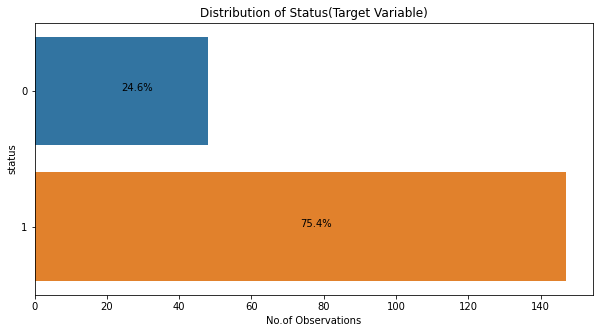

In [8]:
plt.figure(figsize=(10,5))

ax = sns.countplot(y=df["status"], data=df)
plt.title('Distribution of Status(Target Variable)')
plt.xlabel('No.of Observations')

total = len(df["status"])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

#### Understanding & Studying The Data

**Data Observation:**
1. The target variable is 'status' and its type is int64, this need to be converted into categorical variable for analysis
2. The are total of 23 attributes and "name" is recording number not required for analysis and it is dropped
3. Features are having different units and scale and it is to be noted that model get baised toward attribute having 
   dominate units/scaling, so it is important to do scaling so that all features dimension maintain the same scale for 
   modeling

**Data Cleaning**
1. data scaling is required
2. outliers treament is required
3. few data have multi gausian distribution..
4. target variable 'status' is of type int64 and this need to be converted into categorical variable for analysis

<h3 id="Q.3 Using univariate & bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)">Q.3 Using univariate & bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)</h3>

In [9]:
# Analyse the data distribution of each columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


#### univariant analysis: Obsevation based on above Describe Function

**For following Attributes:** 

MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DD, 
MDVP:Shimmer, MDVP:Shimmer(dB), MDVP:APQ, Shimmer:DDA, NHR, PPE

1. The mean is slightly higher than median - Indicating Right Skew(Positive Skew) 
2. Data is tailed more toward right. Q3 and Max difference is significanlty large compared to Q1 and Min difference

**For following Attributes:** 

Shimmer:APQ3, Shimmer:APQ5 : 

1. mean is slightly higher that median and data is sligtly right tailed

**For following Attributes:**

HNR

1. mean is lessor than median and data is slightly tailed towards left side.

**For following Attributes:**

RPDE, DFA, spread1, spread2, D2 : 

1. data looks normal having mean and median nearly same..

In [10]:
df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

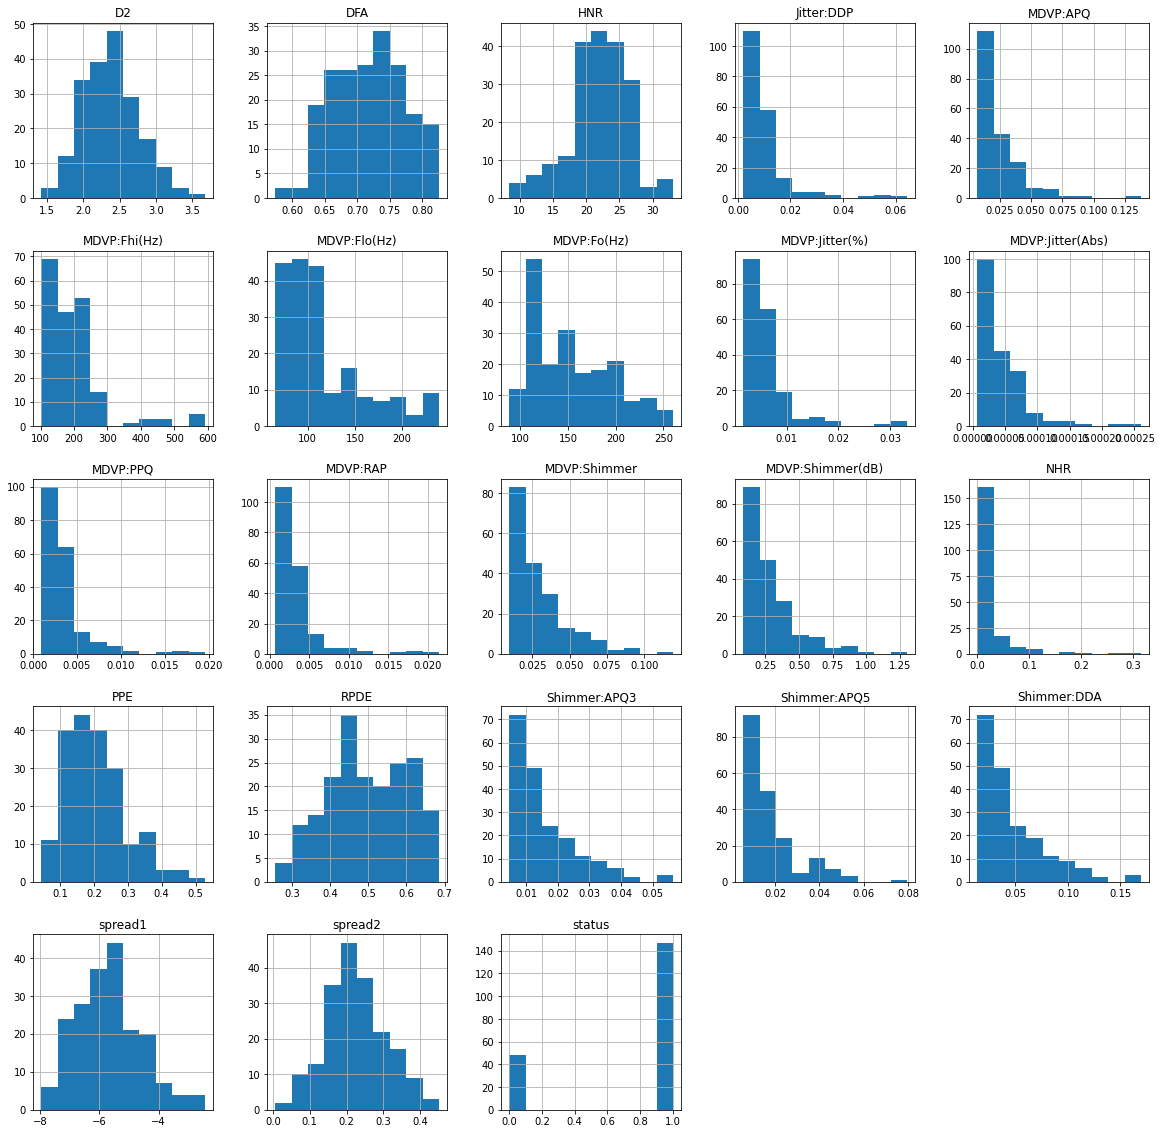

In [11]:
# perform univariant analysis by generating histogram of all dimensions
df.hist(figsize = [20,20])
plt.show()

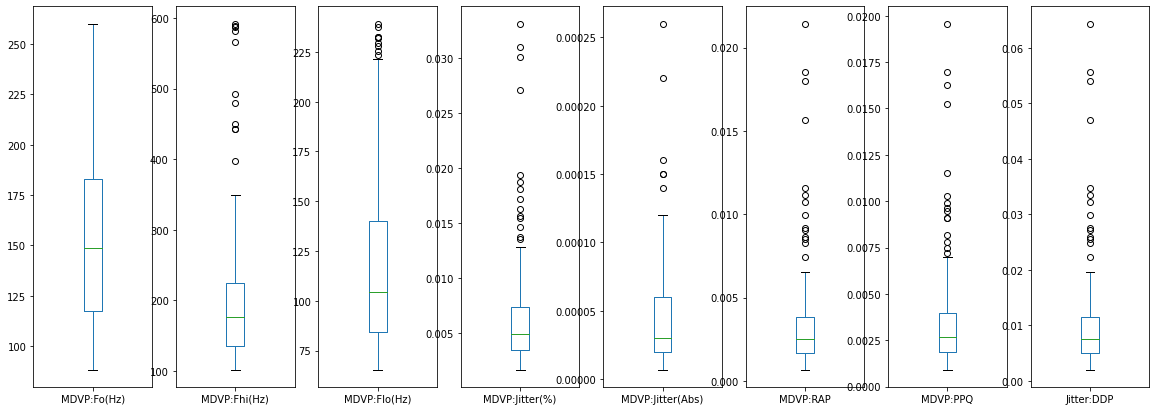

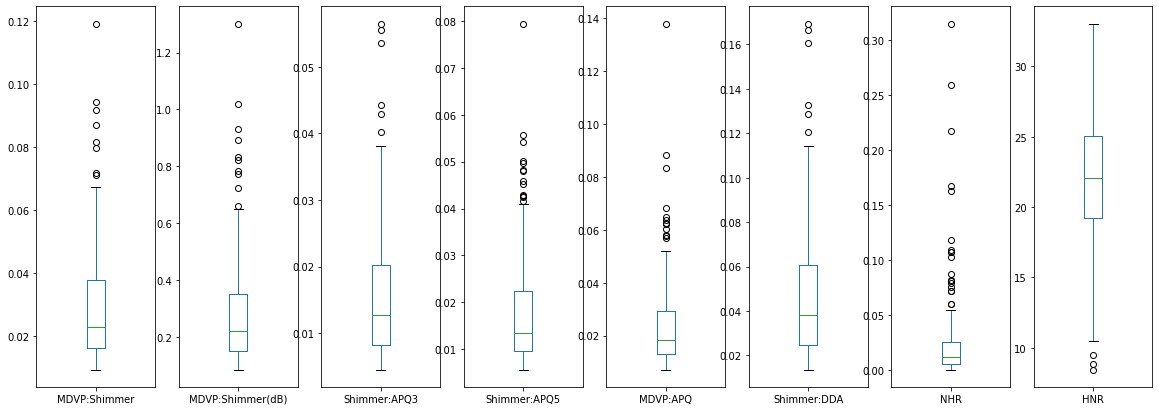

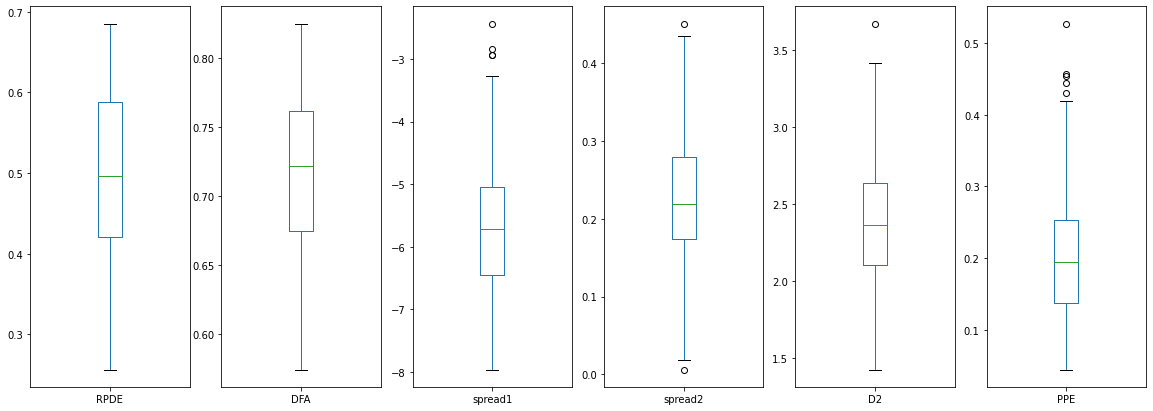

In [12]:
# plot box plots for independent feature(features with numerical values) to check the outliers
fig, ax = plt.subplots(figsize=(20,7))
df.iloc[:,0:8].plot(kind="box",subplots = True, ax=ax)

fig, ax = plt.subplots(figsize=(20,7))
df.iloc[:,8:16].plot(kind="box",subplots = True, ax=ax)

fig, ax = plt.subplots(figsize=(20,7))
df.iloc[:,17:24].plot(kind="box",subplots = True, ax=ax)
plt.show()

In [ ]:
# bivariable analysis
sns.pairplot(df,diag_kind="kde", hue="status")

#### Bivariant analysis: Obsevation based on above Pair Plot

1. The distributions are more separable on some dimensions such as 
    1. spread1
    2. spread2
    3. PPE
    4. D2

**These Can be good attributes For Prediction** - Mean might contribute largely for the prediction
2. Attributes with multi gausian distributions: 
    
    1. MDVP:Fo(Hz)
    2. MDVP:Flo(Hz) 
    3. DFA

**It might be that these data points are collected from two different process/sources**
3. The Following are Negatively Corelated with Target Variable
    
    1. MDVP:Fo(Hz) 
    2. MDVP:Fhi(Hz)
    3. MDVP:Flo(Hz) 
    4. HNR

#### Studying Correlation Coefficient

In [14]:
df.corr(method='pearson', min_periods=1)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [15]:
# Analysing independent variable correlation with target variable
corr_list = df.corrwith(df["status"])
corr_list.to_frame('Correlation')

,Correlation
MDVP:Fo(Hz),-0.383535
MDVP:Fhi(Hz),-0.166136
MDVP:Flo(Hz),-0.380200
MDVP:Jitter(%),0.278220
MDVP:Jitter(Abs),0.338653
MDVP:RAP,0.266668
MDVP:PPQ,0.288698
Jitter:DDP,0.266646
MDVP:Shimmer,0.367430
MDVP:Shimmer(dB),0.350697


#### Obsevation based on Correlation Coefficient

1. The Following are having Strong Positive Correlation with Target Variable
    1. spread1
    2. spread2
    3. PPE
2. The Following are Negatively Corelated with Target Variable
    1. MDVP:Fo(Hz) 
    2. MDVP:Fhi(Hz)
    3. MDVP:Flo(Hz) 
    4. HNR

#### Distribution analysis of Target Variable "Status"

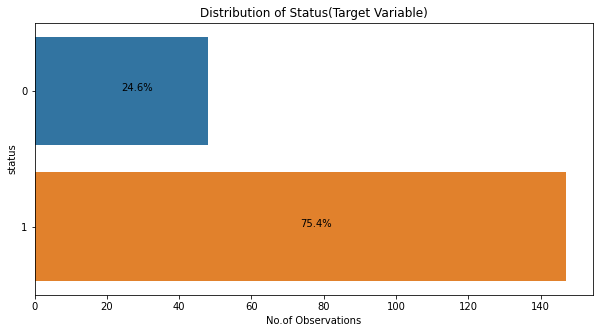

In [16]:
plt.figure(figsize=(10,5))

ax = sns.countplot(y=df["status"], data=df)
plt.title('Distribution of Status(Target Variable)')
plt.xlabel('No.of Observations')

total = len(df["status"])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

**Observation :** 

In the Dataset 75% are true cases and 25% are false cases. The Datset is not balanced, Hence sufficient care to be taken while modelling as Modelling can be biased towards patient being positive for **Parkinsons Disease**.

#### Dealing with Outliers

In [17]:
df_treated = df.copy()  # make copy of orignal dataframe

# function to replace upper outlier with their max value of (Q3 + 1.5 * IRQ)
def treat_upper_outliers(df1, colname):
    data = df1[colname]
    irq = np.quantile(a=data,q=0.75)-np.quantile(a=data,q=0.25)
    ub = np.quantile(a=data,q=0.75) + 1.5 * irq
    df1[colname] = df1[colname].apply(lambda x: ub if x > ub else x)
    
# function to replace lower outlier with their min value of (Q1 - 1.5 * IRQ)
def treat_lower_outliers(df1, colname):
    data = df1[colname]
    irq = np.quantile(a=data,q=0.75)-np.quantile(a=data,q=0.25)
    lb = np.quantile(a=data,q=0.25) - 1.5 * irq
    df1[colname] = df1[colname].apply(lambda x: lb if x < lb else x)

# outlier treatment
treat_upper_outliers(df_treated, "MDVP:Fhi(Hz)") 
treat_upper_outliers(df_treated, "MDVP:Flo(Hz)") 
treat_upper_outliers(df_treated, "MDVP:Jitter(%)") 
treat_upper_outliers(df_treated, "MDVP:Jitter(Abs)") 
treat_upper_outliers(df_treated, "MDVP:RAP") 
treat_upper_outliers(df_treated, "MDVP:PPQ") 
treat_upper_outliers(df_treated, "Jitter:DDP") 
treat_upper_outliers(df_treated, "MDVP:Shimmer") 
treat_upper_outliers(df_treated, "MDVP:Shimmer(dB)") 
treat_upper_outliers(df_treated, "Shimmer:APQ3") 
treat_upper_outliers(df_treated, "Shimmer:APQ5") 
treat_upper_outliers(df_treated, "MDVP:APQ") 
treat_upper_outliers(df_treated, "Shimmer:DDA") 
treat_upper_outliers(df_treated, "NHR") 
treat_upper_outliers(df_treated, "PPE") 

treat_lower_outliers(df_treated, "HNR")

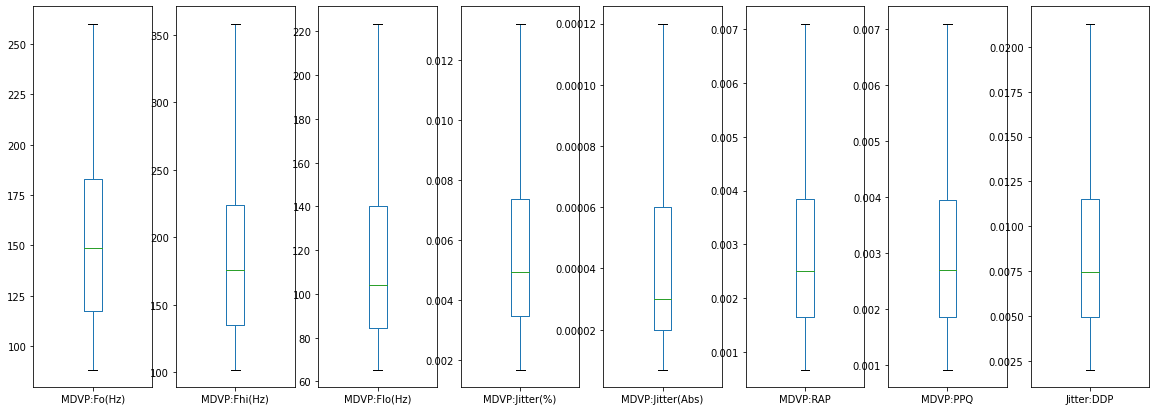

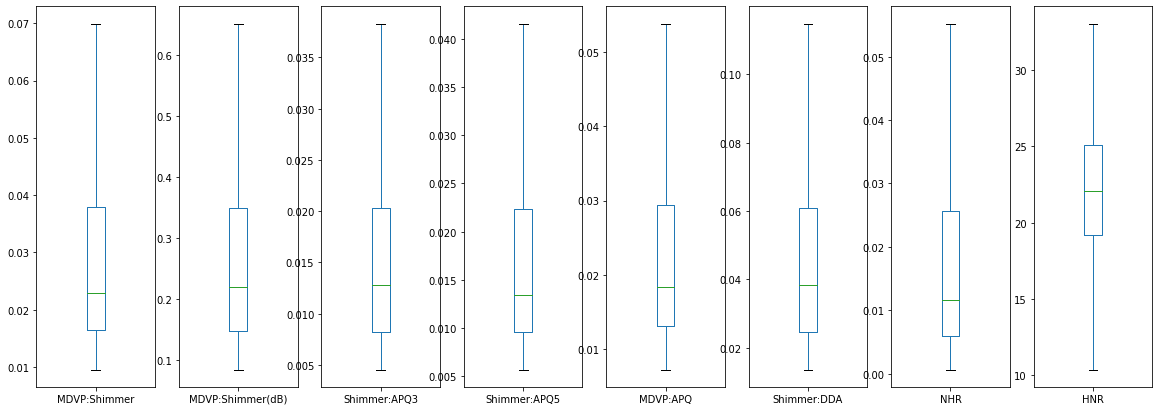

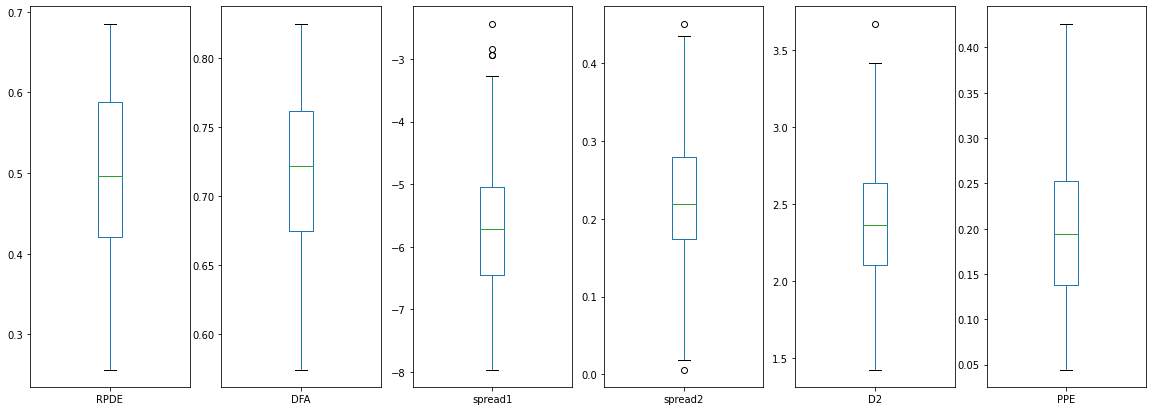

In [18]:

# plot box plots again for independent feature(features with numerical values) to check if outliers got treated properly..
fig, ax = plt.subplots(figsize=(20,7))
df_treated.iloc[:,0:8].plot(kind="box",subplots = True, ax=ax)

fig, ax = plt.subplots(figsize=(20,7))
df_treated.iloc[:,8:16].plot(kind="box",subplots = True, ax=ax)

fig, ax = plt.subplots(figsize=(20,7))
df_treated.iloc[:,17:24].plot(kind="box",subplots = True, ax=ax)
plt.show()

***After treating the outliers we can observe that the Data has become less Noisy***

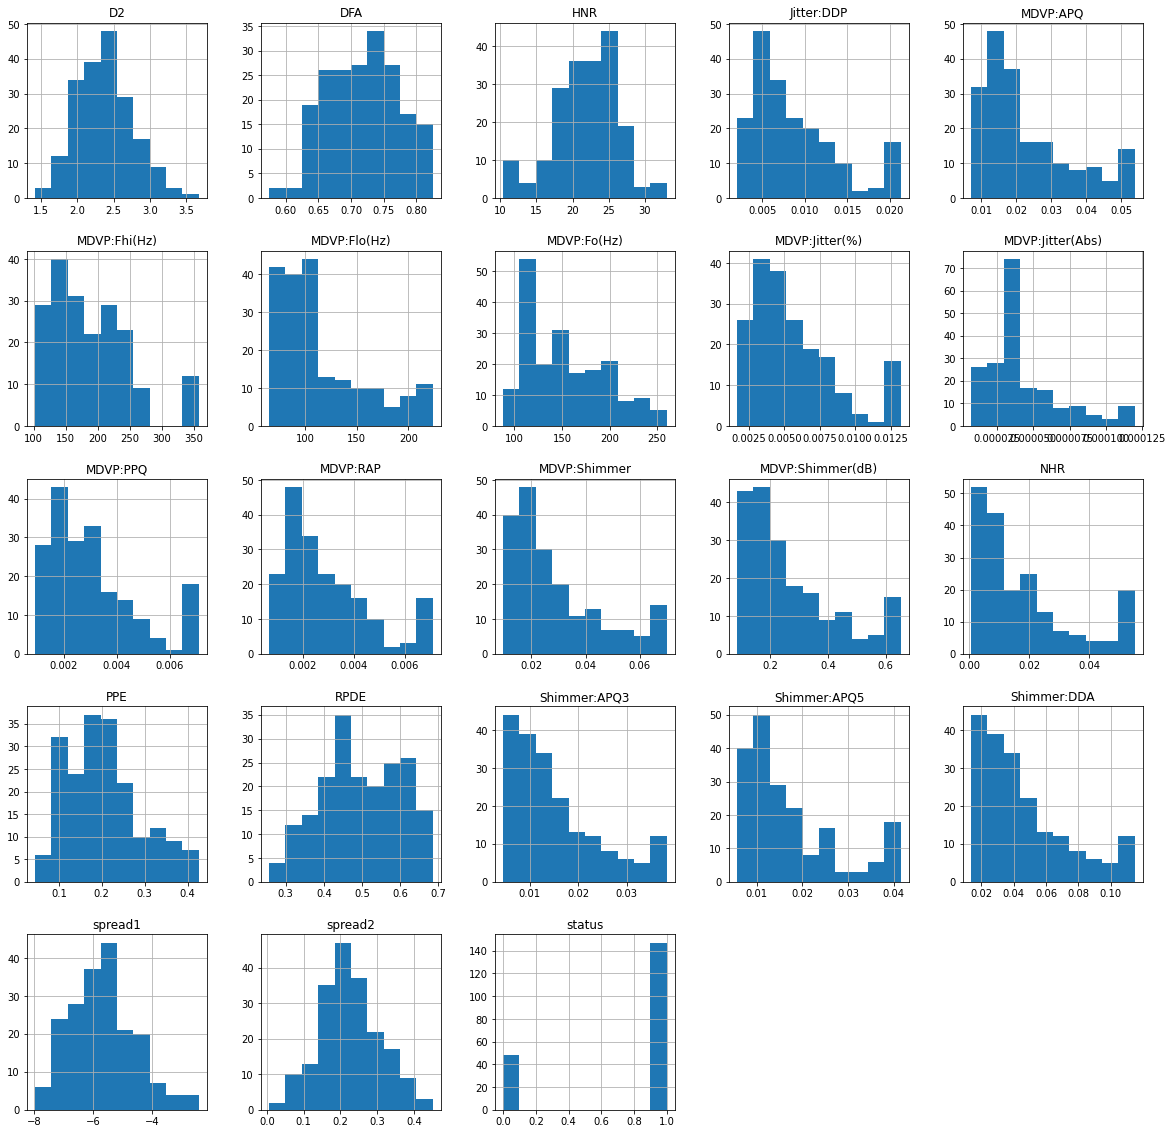

In [19]:
# perform univariant analysis by generating histogram of all dimensions
df_treated.hist(figsize = [20,20])
plt.show()

In [20]:
df_treated.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

#### Scaling the Data - To bring all the data into a similar range.

##### Using SK Learn MinMax Scaler Function

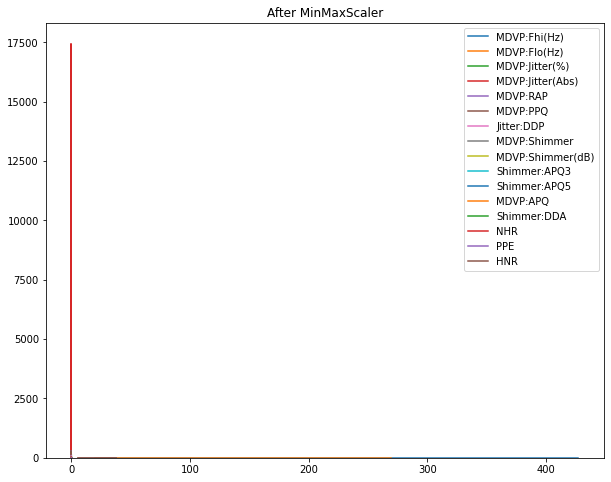

In [21]:
col_names = list(df_treated.columns)
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(df_treated)

df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After MinMaxScaler')

sns.kdeplot(df_treated["MDVP:Fhi(Hz)"], ax=ax1)
sns.kdeplot(df_treated["MDVP:Flo(Hz)"], ax=ax1)
sns.kdeplot(df_treated["MDVP:Jitter(%)"], ax=ax1)
sns.kdeplot(df_treated["MDVP:Jitter(Abs)"], ax=ax1)
sns.kdeplot(df_treated["MDVP:RAP"], ax=ax1)
sns.kdeplot(df_treated["MDVP:PPQ"], ax=ax1)
sns.kdeplot(df_treated["Jitter:DDP"], ax=ax1)
sns.kdeplot(df_treated["MDVP:Shimmer"], ax=ax1)
sns.kdeplot(df_treated["MDVP:Shimmer(dB)"], ax=ax1)
sns.kdeplot(df_treated["Shimmer:APQ3"], ax=ax1)
sns.kdeplot(df_treated["Shimmer:APQ5"], ax=ax1)
sns.kdeplot(df_treated["MDVP:APQ"], ax=ax1)
sns.kdeplot(df_treated["Shimmer:DDA"], ax=ax1)
sns.kdeplot(df_treated["NHR"], ax=ax1)
sns.kdeplot(df_treated["PPE"], ax=ax1)
sns.kdeplot(df_treated["HNR"], ax=ax1);

#### Observe the Data After Scaling

In [22]:
df_mm.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0.184308,0.215394,0.060209,0.533680,0.557522,0.470588,0.747875,0.470252,0.566085,0.601146,...,0.511729,0.393310,0.469937,1.0,0.369155,0.960148,0.569875,0.585765,0.390661,0.629010
1,0.198327,0.181607,0.305710,0.693091,0.646018,0.618621,0.977742,0.618342,0.857403,0.953724,...,0.794015,0.341627,0.383991,1.0,0.470830,0.977024,0.703277,0.741337,0.473145,0.849111
2,0.165039,0.113115,0.291393,0.764133,0.734513,0.741722,1.000000,0.742531,0.708268,0.699868,...,0.682108,0.227995,0.453083,1.0,0.404416,1.000000,0.636745,0.686371,0.408819,0.754700
3,0.165004,0.139514,0.290197,0.718215,0.734513,0.676276,0.980979,0.676020,0.751138,0.761569,...,0.731592,0.236060,0.452775,1.0,0.416255,0.975885,0.695627,0.738089,0.436977,0.849900
4,0.161150,0.154783,0.285701,0.966862,0.911504,0.914686,1.000000,0.915562,0.905570,0.879683,...,0.899402,0.311936,0.408875,1.0,0.375159,0.992813,0.762472,0.513798,0.404336,0.958247


**Obervation:** The Complete data is transformed into single range of values

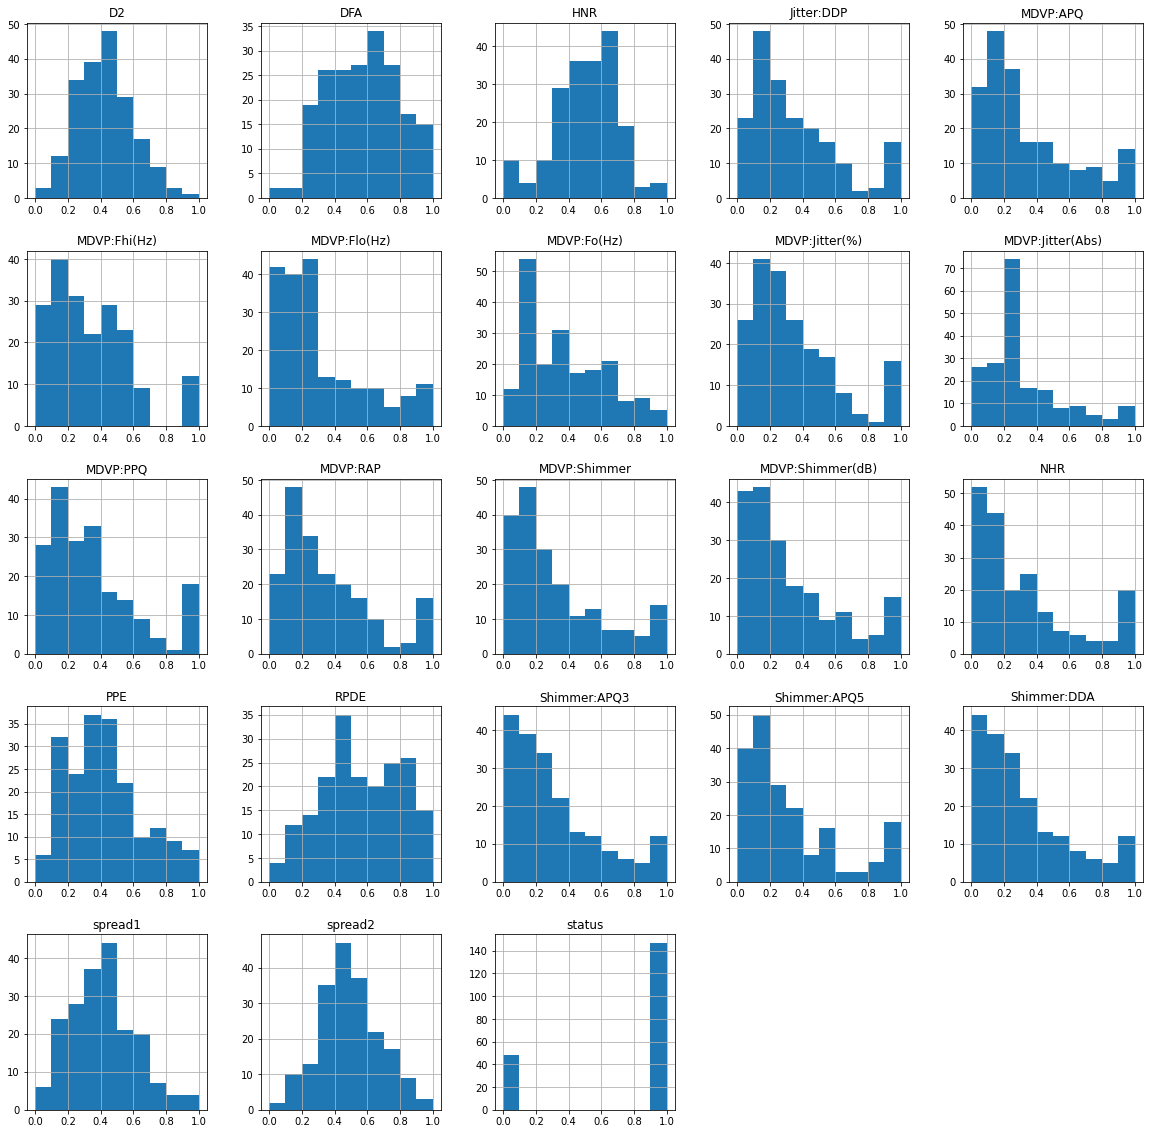

In [23]:
# perform univariant analysis by generating histogram of all dimensions
df_mm.hist(figsize = [20,20])
plt.show()

#### Observing the Min & Max Values before and After Scaling

In [24]:
mins = [df_treated[col].min() for col in df_treated.columns]
mins

[88.333,
 102.145,
 65.476,
 0.00168,
 7.000000000000001e-06,
 0.0006799999999999999,
 0.0009199999999999999,
 0.0020399999999999997,
 0.00954,
 0.085,
 0.00455,
 0.0057,
 0.00719,
 0.013640000000000001,
 0.00065,
 10.381750000000004,
 0,
 0.25656999999999996,
 0.574282,
 -7.964983999999999,
 0.006274,
 1.4232870000000002,
 0.044538999999999995]

In [25]:
mins = [df_mm[col].min() for col in df_mm.columns]
mins

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [26]:
maxs = [df_treated[col].max() for col in df_treated.columns]
maxs

[260.105,
 358.22,
 223.60975000000005,
 0.0132225,
 0.00011999999999999999,
 0.0070975,
 0.0070975000000000005,
 0.021285,
 0.069955,
 0.6522499999999999,
 0.038294999999999996,
 0.04158,
 0.053880000000000004,
 0.114885,
 0.0552125,
 33.047,
 1,
 0.6851510000000001,
 0.8252879999999999,
 -2.434031,
 0.45049300000000003,
 3.671155,
 0.42627349999999997]

In [27]:
maxs = [df_mm[col].max() for col in df_mm.columns]
maxs

[0.9999999999999999,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999999,
 0.9999999999999998,
 1.0,
 0.9999999999999999,
 0.9999999999999999,
 0.9999999999999999,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999999,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0000000000000002,
 0.9999999999999999,
 0.9999999999999999]

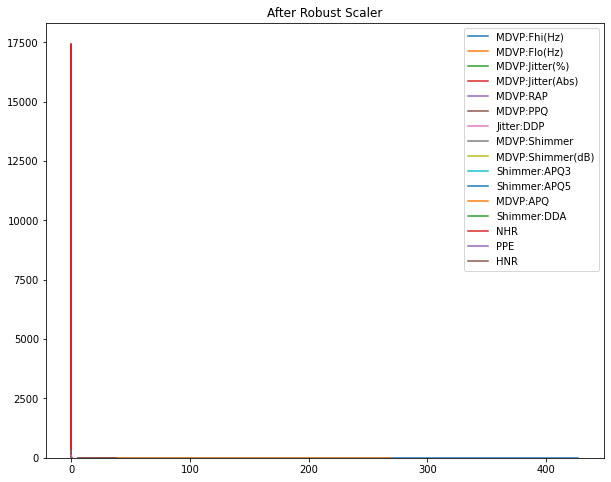

In [28]:
col_names = list(df_treated.columns)
r_scaler = preprocessing.RobustScaler()
df_r = r_scaler.fit_transform(df_treated)

df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After Robust Scaler')

sns.kdeplot(df_treated["MDVP:Fhi(Hz)"], ax=ax1)
sns.kdeplot(df_treated["MDVP:Flo(Hz)"], ax=ax1)
sns.kdeplot(df_treated["MDVP:Jitter(%)"], ax=ax1)
sns.kdeplot(df_treated["MDVP:Jitter(Abs)"], ax=ax1)
sns.kdeplot(df_treated["MDVP:RAP"], ax=ax1)
sns.kdeplot(df_treated["MDVP:PPQ"], ax=ax1)
sns.kdeplot(df_treated["Jitter:DDP"], ax=ax1)
sns.kdeplot(df_treated["MDVP:Shimmer"], ax=ax1)
sns.kdeplot(df_treated["MDVP:Shimmer(dB)"], ax=ax1)
sns.kdeplot(df_treated["Shimmer:APQ3"], ax=ax1)
sns.kdeplot(df_treated["Shimmer:APQ5"], ax=ax1)
sns.kdeplot(df_treated["MDVP:APQ"], ax=ax1)
sns.kdeplot(df_treated["Shimmer:DDA"], ax=ax1)
sns.kdeplot(df_treated["NHR"], ax=ax1)
sns.kdeplot(df_treated["PPE"], ax=ax1)
sns.kdeplot(df_treated["HNR"], ax=ax1);

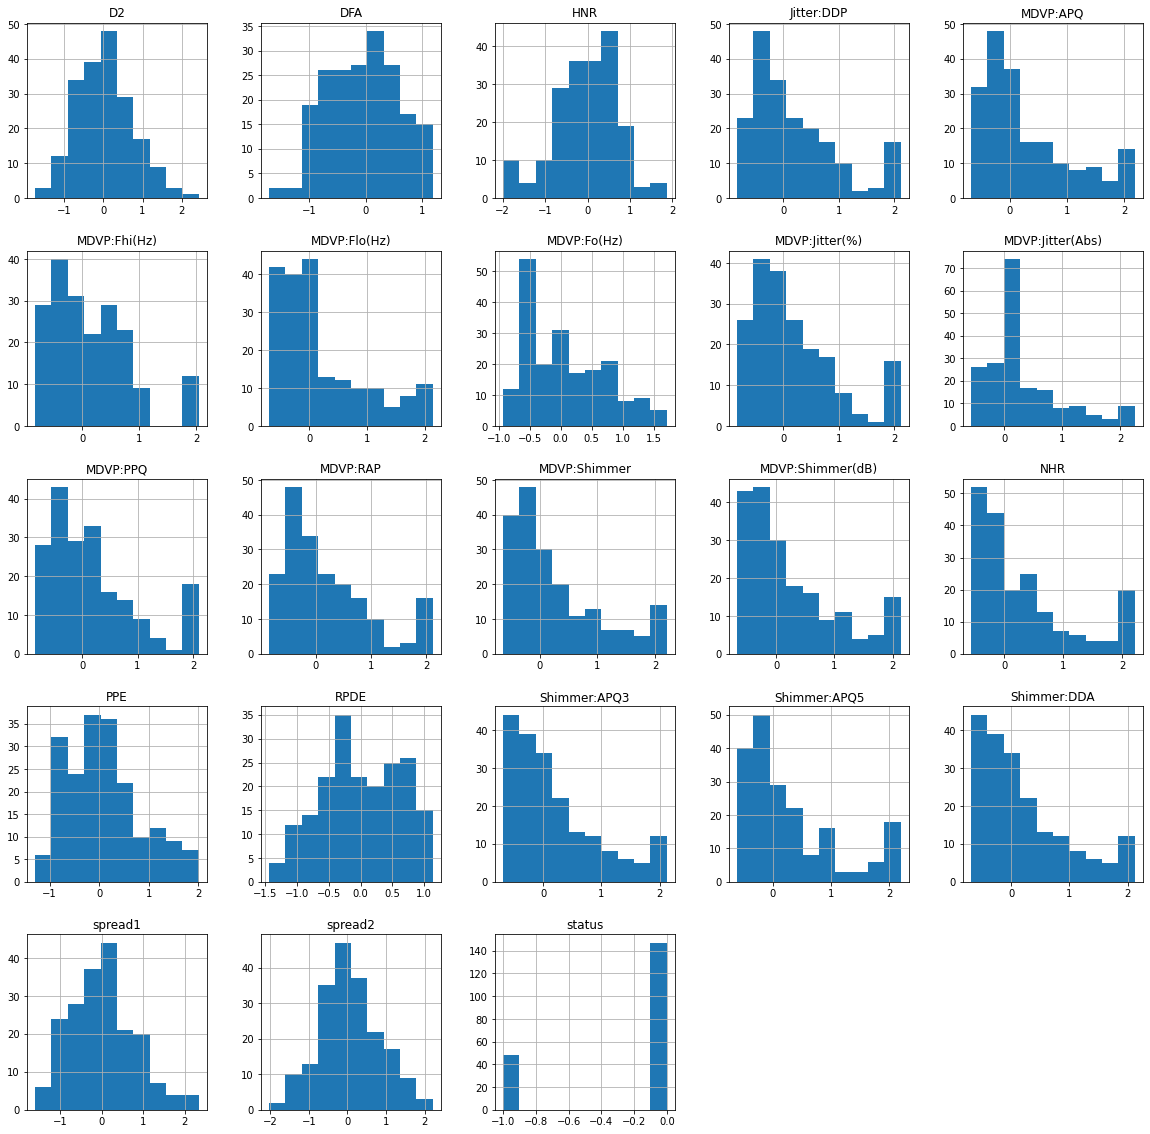

In [29]:
# perform univariant analysis by generating histogram of all dimensions
df_r.hist(figsize = [20,20])
plt.show()

In [30]:
df_r.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.441707,-0.207369,-0.526096,0.742638,1.00,0.551724,1.360382,0.552147,0.971469,1.017370,...,0.751248,0.530053,-0.178988,0.0,-0.488228,1.067800,0.646652,0.453808,-0.111831,0.784236
1,-0.404773,-0.304210,0.170544,1.213828,1.25,0.988506,2.038186,0.989264,1.794668,2.009926,...,1.543816,0.387015,-0.510421,0.0,-0.226126,1.116420,1.172214,1.112711,0.233233,1.511499
2,-0.492477,-0.500520,0.129918,1.423816,1.50,1.351724,2.103819,1.355828,1.373246,1.295285,...,1.229617,0.072534,-0.243981,0.0,-0.397332,1.182613,0.910097,0.879910,-0.035868,1.199543
3,-0.492569,-0.424857,0.126526,1.288092,1.50,1.158621,2.047733,1.159509,1.494387,1.468983,...,1.368552,0.094852,-0.245172,0.0,-0.366813,1.113138,1.142077,1.098953,0.081927,1.514105
4,-0.502723,-0.381093,0.113768,2.023047,2.00,1.862069,2.103819,1.866564,1.930776,1.801489,...,1.839712,0.304844,-0.414462,0.0,-0.472751,1.161907,1.405424,0.149003,-0.054626,1.872110


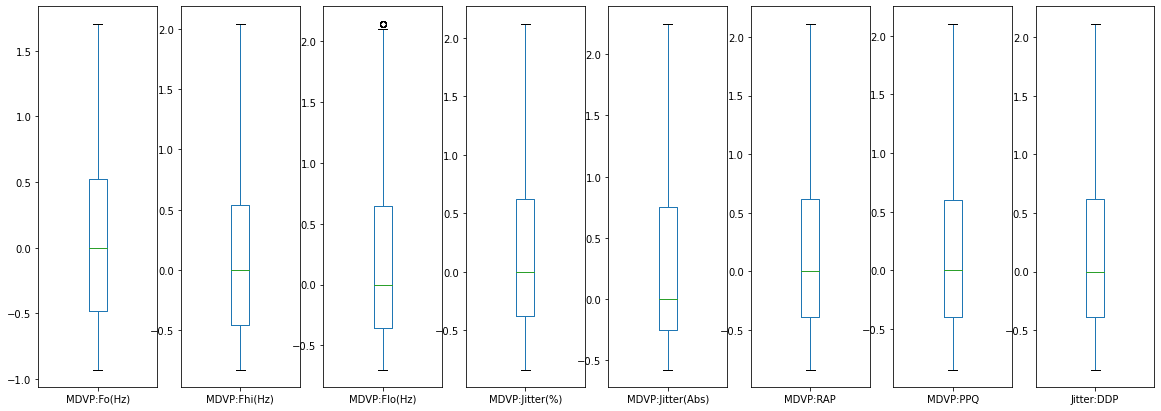

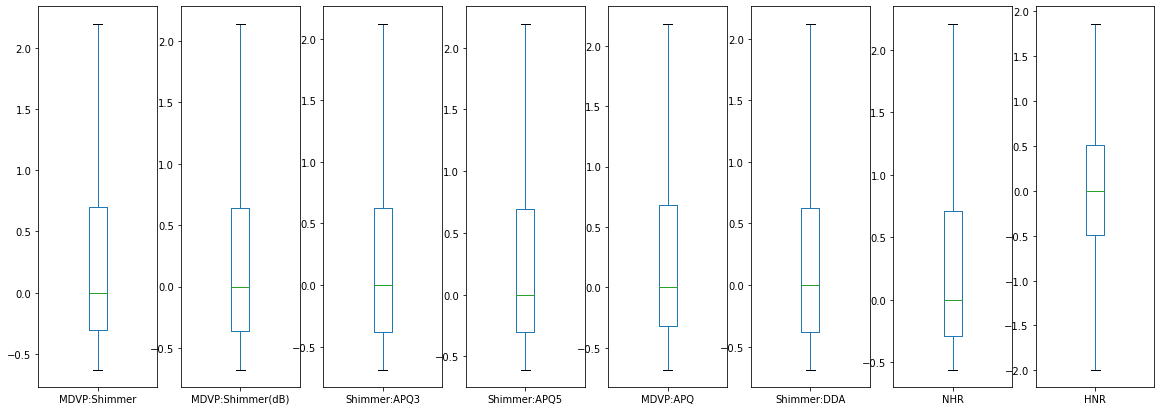

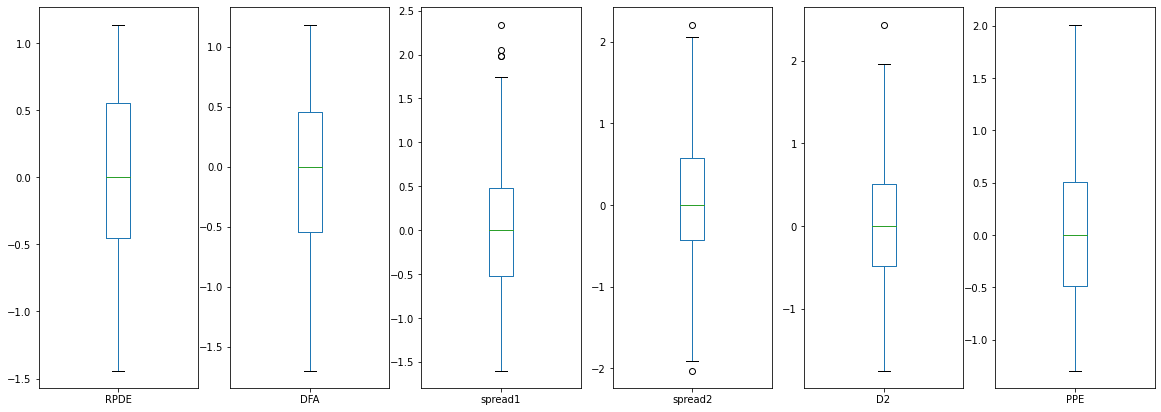

In [31]:
# plot box plots again for independent feature(features with numerical values) to check if outliers got treated properly..
fig, ax = plt.subplots(figsize=(20,7))
df_r.iloc[:,0:8].plot(kind="box",subplots = True, ax=ax)

fig, ax = plt.subplots(figsize=(20,7))
df_r.iloc[:,8:16].plot(kind="box",subplots = True, ax=ax)

fig, ax = plt.subplots(figsize=(20,7))
df_r.iloc[:,17:24].plot(kind="box",subplots = True, ax=ax)
plt.show()

In [32]:
df_r.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [33]:
# function to replace upper outlier with their max value of (Q3 + 1.5 * IRQ)
def treat_upper_outliers(df2, colname):
    data = df2[colname]
    irq = np.quantile(a=data,q=0.75)-np.quantile(a=data,q=0.25)
    ub = np.quantile(a=data,q=0.75) + 1.5 * irq
    df2[colname] = df2[colname].apply(lambda x: ub if x > ub else x)
    
# function to replace lower outlier with their min value of (Q1 - 1.5 * IRQ)
def treat_lower_outliers(df2, colname):
    data = df2[colname]
    irq = np.quantile(a=data,q=0.75)-np.quantile(a=data,q=0.25)
    lb = np.quantile(a=data,q=0.25) - 1.5 * irq
    df2[colname] = df2[colname].apply(lambda x: lb if x < lb else x)

# outlier treatment
treat_upper_outliers(df_r, "MDVP:Flo(Hz)")

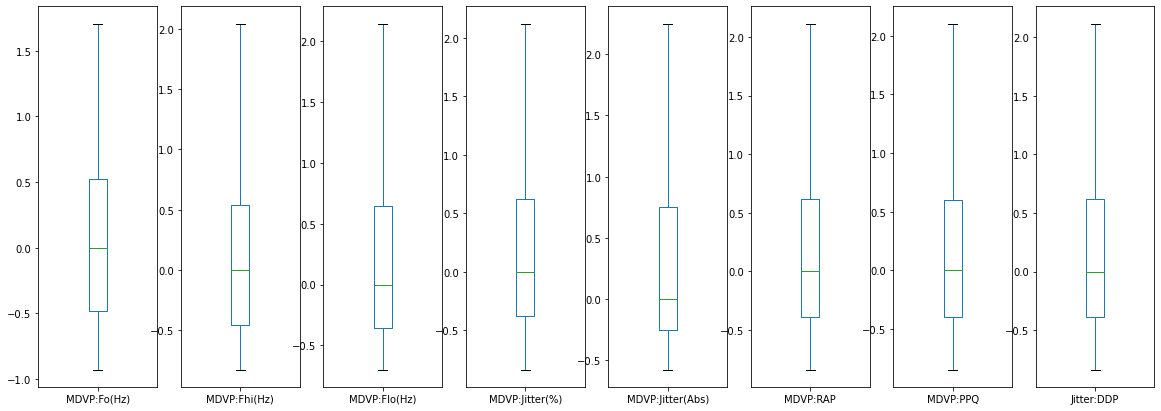

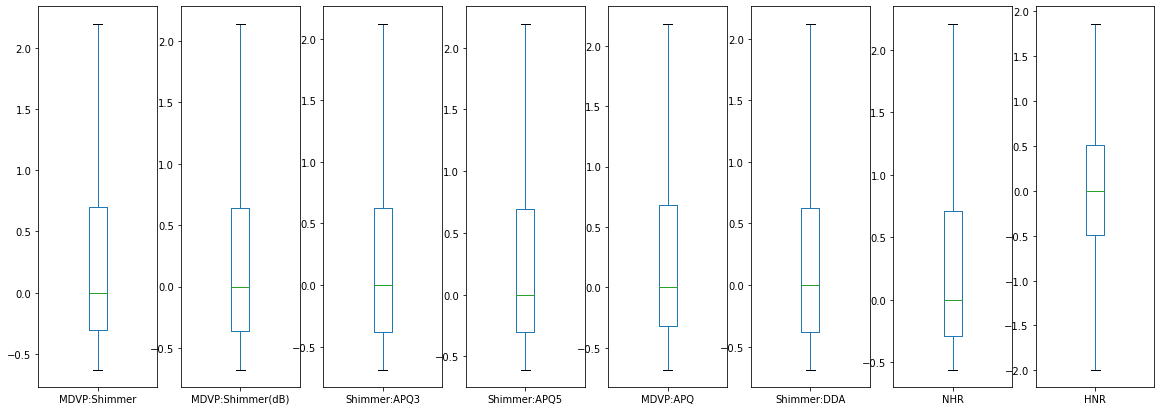

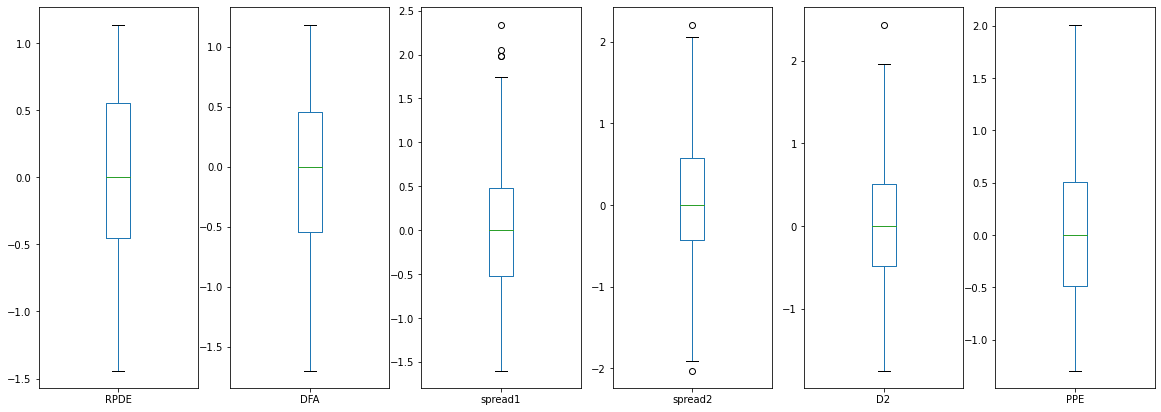

In [34]:
# plot box plots again for independent feature(features with numerical values) to check if outliers got treated properly..
fig, ax = plt.subplots(figsize=(20,7))
df_r.iloc[:,0:8].plot(kind="box",subplots = True, ax=ax)

fig, ax = plt.subplots(figsize=(20,7))
df_r.iloc[:,8:16].plot(kind="box",subplots = True, ax=ax)

fig, ax = plt.subplots(figsize=(20,7))
df_r.iloc[:,17:24].plot(kind="box",subplots = True, ax=ax)
plt.show()

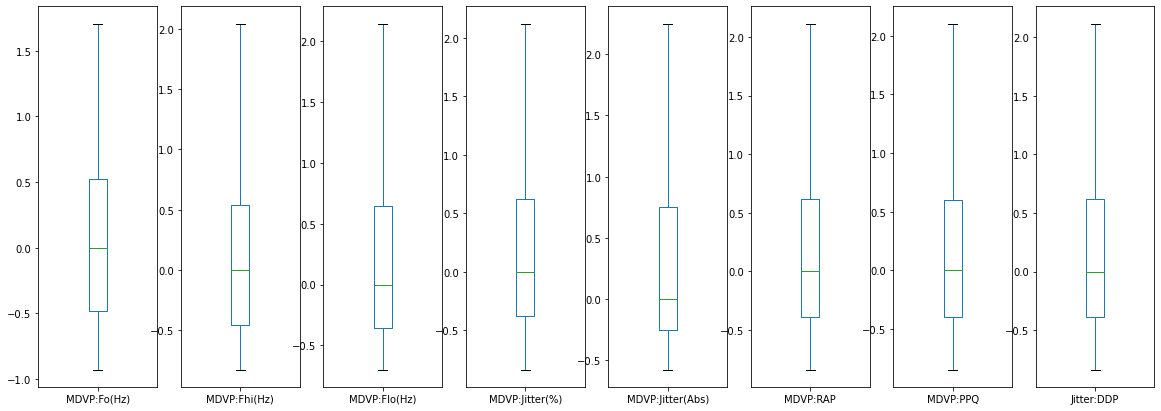

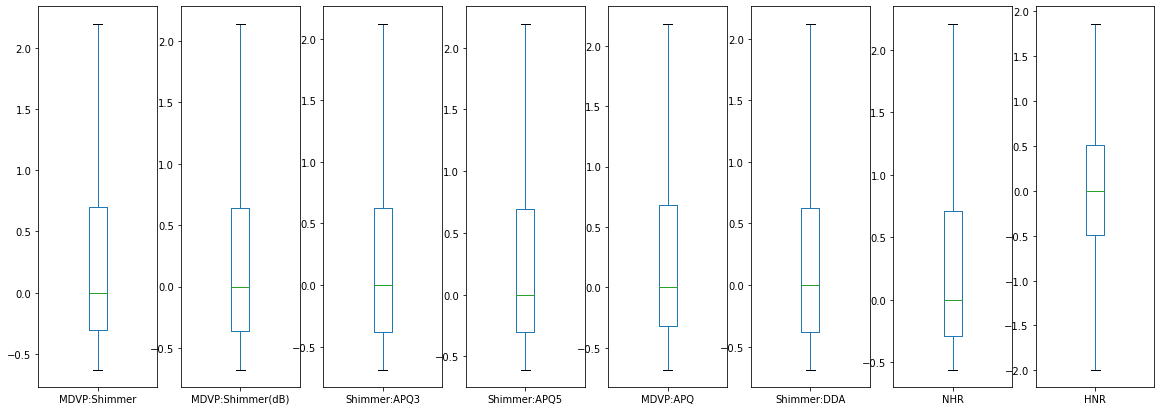

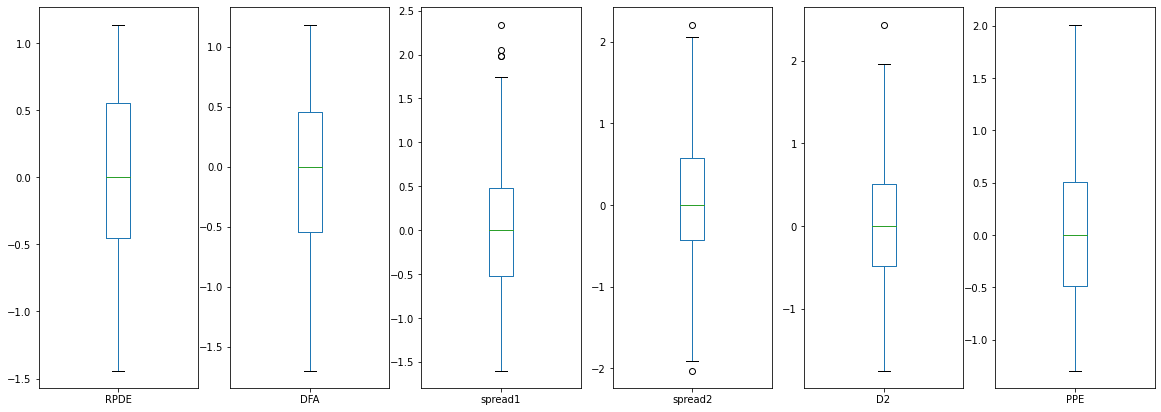

In [35]:
# plot box plots again for independent feature(features with numerical values) to check if outliers got treated properly..
fig, ax = plt.subplots(figsize=(20,7))
df_r.iloc[:,0:8].plot(kind="box",subplots = True, ax=ax)

fig, ax = plt.subplots(figsize=(20,7))
df_r.iloc[:,8:16].plot(kind="box",subplots = True, ax=ax)

fig, ax = plt.subplots(figsize=(20,7))
df_r.iloc[:,17:24].plot(kind="box",subplots = True, ax=ax)
plt.show()

In [36]:
# function to replace upper outlier with their max value of (Q3 + 1.5 * IRQ)
def treat_upper_outliers(df3, colname):
    data = df3[colname]
    irq = np.quantile(a=data,q=0.75)-np.quantile(a=data,q=0.25)
    ub = np.quantile(a=data,q=0.75) + 1.5 * irq
    df3[colname] = df3[colname].apply(lambda x: ub if x > ub else x)
    
# function to replace lower outlier with their min value of (Q1 - 1.5 * IRQ)
def treat_lower_outliers(df3, colname):
    data = df3[colname]
    irq = np.quantile(a=data,q=0.75)-np.quantile(a=data,q=0.25)
    lb = np.quantile(a=data,q=0.25) - 1.5 * irq
    df3[colname] = df3[colname].apply(lambda x: lb if x < lb else x)

# outlier treatment
treat_upper_outliers(df_r, "MDVP:Fhi(Hz)") 
treat_upper_outliers(df_r, "MDVP:Flo(Hz)") 
treat_upper_outliers(df_r, "NHR")

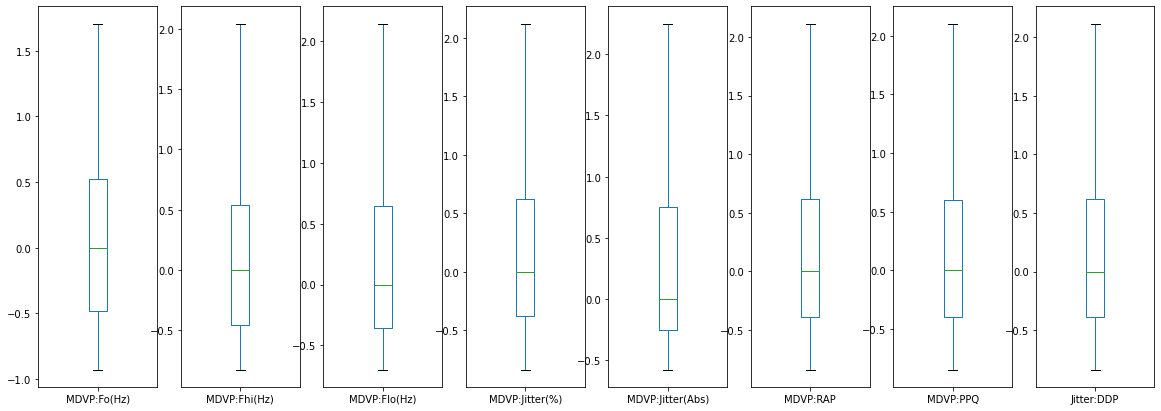

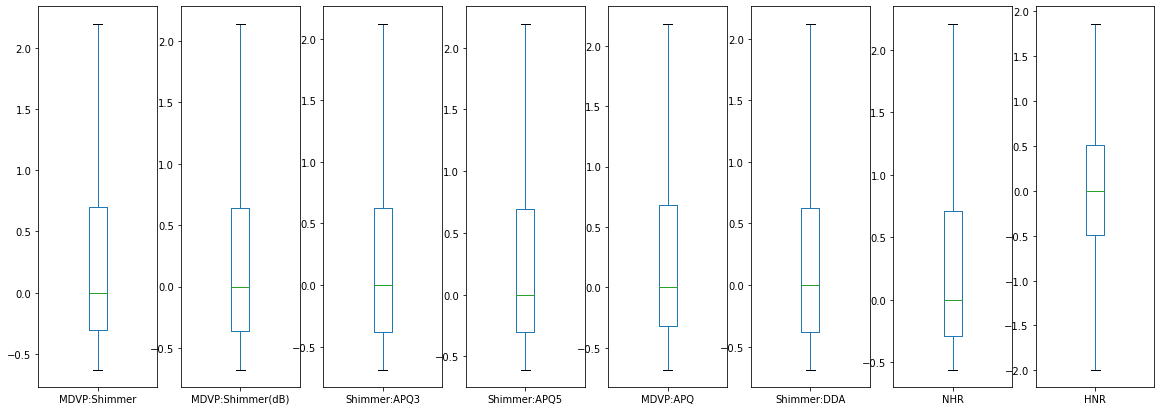

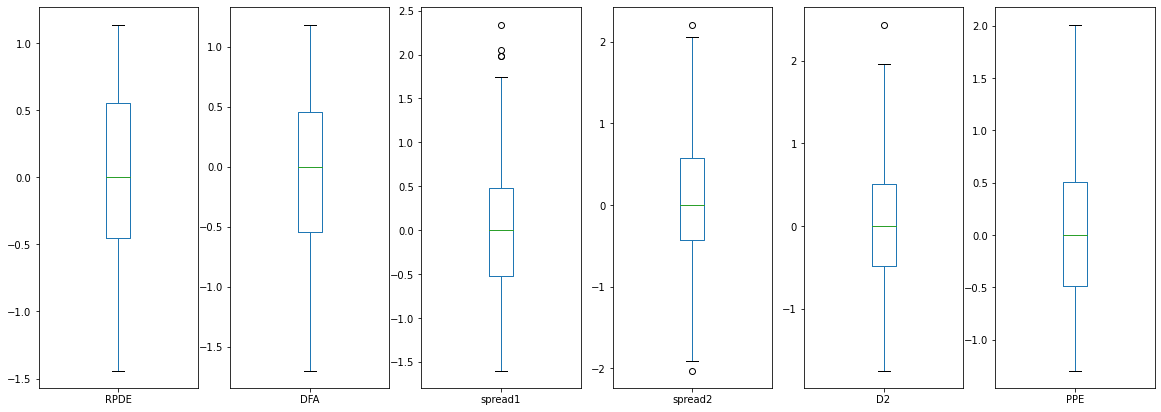

In [37]:
# plot box plots again for independent feature(features with numerical values) to check if outliers got treated properly..
fig, ax = plt.subplots(figsize=(20,7))
df_r.iloc[:,0:8].plot(kind="box",subplots = True, ax=ax)

fig, ax = plt.subplots(figsize=(20,7))
df_r.iloc[:,8:16].plot(kind="box",subplots = True, ax=ax)

fig, ax = plt.subplots(figsize=(20,7))
df_r.iloc[:,17:24].plot(kind="box",subplots = True, ax=ax)
plt.show()

***Observation : After Scaling the data and treating the outliers we can observe that the Data has become Smooth with no Noise***

<h1 id="Q.4 Split the dataset into training and test set in the ratio of 70:30 (Training:Test).">Q.4 Split the dataset into training and test set in the ratio of 70:30 (Training:Test).</h3>

In [38]:
feature_df_mm = df_mm.drop(columns=["status"])
target_df_mm = df_mm["status"]

X = np.array(feature_df_mm)
y = np.array(target_df_mm)

# split dataset into training and test data with 70:30 split
test_size = 0.30 # taking 70:30 training and test set
seed = 0  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,random_state=seed)

In [39]:
X_train

array([[0.66541113, 1.        , 0.70688262, ..., 0.57630808, 0.66148279,
        0.59107573],
       [0.3615665 , 0.23936737, 0.50122128, ..., 0.39832605, 0.37410515,
        0.26082526],
       [0.11919288, 0.1269589 , 0.236496  , ..., 0.44861656, 0.2507318 ,
        0.71295888],
       ...,
       [0.47983955, 1.        , 0.0857249 , ..., 0.82355775, 0.69069981,
        0.62410131],
       [0.95546422, 0.62224739, 0.74184037, ..., 0.43806996, 0.2692885 ,
        0.10965475],
       [0.13044035, 0.04472127, 0.21920052, ..., 0.41893976, 0.20718076,
        0.33953703]])

<h1 id="Q.5 Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)">Q.5 Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)</h3>

In [40]:
dt_model=DecisionTreeClassifier(criterion = 'entropy', random_state=0)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

#### Studying the Feature Importance

In [41]:
# for above trained model get the feature importance
feature_imp = pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = feature_df_mm.columns)
print(feature_imp)

                       Imp
MDVP:Fo(Hz)       0.040480
MDVP:Fhi(Hz)      0.091243
MDVP:Flo(Hz)      0.089853
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.038864
MDVP:RAP          0.000000
MDVP:PPQ          0.000000
Jitter:DDP        0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ3      0.000000
Shimmer:APQ5      0.000000
MDVP:APQ          0.126825
Shimmer:DDA       0.000000
NHR               0.041916
HNR               0.000000
RPDE              0.076591
DFA               0.071018
spread1           0.000000
spread2           0.074967
D2                0.038739
PPE               0.309505


[0.1550357  0.08974917 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.11769992 0.04970723 0.05615203 0.03584669 0.1650705  0.
 0.         0.         0.         0.33073875]


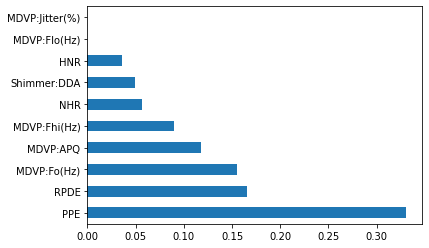

In [42]:
X = np.array(feature_df_mm)
y = np.array(target_df_mm)
model = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index = feature_df_mm.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

<h1 id="Q.6 Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)">Q.6 Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)</h3>

### Prediction Using **Decision Tree Classifier**

#### Decision Tree Classifier Accuracy

In [43]:
# predict the outcome for test data
y_predict = dt_model.predict(X_test)

# calculate accuracy score on test data(this is unseen data not used while modeling)
acc = metrics.accuracy_score(y_test,y_predict)
print("\nAccuracy Score on test data: ", acc)


Accuracy Score on test data:  0.9491525423728814


#### Decision Tree Classifier K Fold Cross Validation Accuracy

In [44]:
# KFold cross validation to get range estimate
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=7, scoring='accuracy')
print("KFold Cross Validation: Accuracy: %0.04f (+/- %0.4f) [Decision Tree]" %(dt_scores.mean()*100, dt_scores.std()*100))
dt_cv_scores = dt_scores

KFold Cross Validation: Accuracy: 79.4361 (+/- 4.6172) [Decision Tree]


#### Crosstab analysis (true values vs predicted values)

In [45]:
# cross tab analysis helps to get precision and recall values for each class..

# precision tells, how many of the selected objects were correct
# recall tells, how well model is able to classify the object

# Performing cross tab analysis between tue and predicted values.
# first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
res = pd.crosstab(y_test, y_predict)

# visualizing the crosstab
print_res = res.copy()
print_res.columns = ['pred:no', 'pred:yes']
print_res.index = ['true:no', 'true:yes']
print("Crosstab Matrix:\n\n ", print_res)

# data for precision and recall calculation for Class0 (Healthy)
class0_tp = res[0][0] # [True Positive] correctly idenfying class0
class0_fn = res[1][0] # [False Negative] not able to identify it as class0
class0_fp = res[0][1] # [Flase Positive] fasely identifying as class0

# data for precision and recall calculation for Class1 (patient with Parkinson's disease)
class1_tp = res[1][1] # [True Positive] correctly idenfying class1
class1_fn = res[0][1] # [False Negative] not able to identify it as class1
class1_fp = res[1][0] # [Flase Positive] fasely identifying as class1

# calculating presision and recall for class0
class0_precision = class0_tp / (class0_tp + class0_fp)
class0_recall = class0_tp / (class0_tp + class0_fn)

# calculating presision and recall for class1
class1_precision = class1_tp / (class1_tp + class1_fp)
class1_recall = class1_tp / (class1_tp + class1_fn)

print("\nclass0 [Healthy]:                precision: %0.2f, recall:  %0.2f" %(class0_precision,class0_recall))
print("class1 [with Parkinson Disease]: precision: %0.2f, recall:  %0.2f" %(class1_precision,class1_recall))

Crosstab Matrix:

            pred:no  pred:yes
true:no        13         0
true:yes        3        43

class0 [Healthy]:                precision: 0.81, recall:  1.00
class1 [with Parkinson Disease]: precision: 1.00, recall:  0.93


#### Observation - Crosstab analysis - Decision tree Classifier

**Crosstab provide some additial insight as below:**

1. recall % of target classification as belwow:
2. **Correctly** predicting **healthy patient**: **100%** 
3. **Correctly** predicting patient **having parkinson's disease** : **93%**

**On test data :**

1. Out of **13 healthy patients**, model is able to classify all **13 patients** as **healthy** with recall rate as **100%**
2. Out of **46 non-healthy patients**, model is able to classify **42 patients** as having **parkingson's disease** with **93% recall rate**

#### Confusion Matrix (true values vs predicted values)

In [46]:
# we can also perform crosstab analysis using Confusion Matric: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
cm = metrics.confusion_matrix(y_test, y_predict)
print("\nConfusion Matrix\n", cm)

# also analysing cross-tab using classification report for the model
cr = metrics.classification_report(y_test, y_predict)
print("\nClassification Report::\n",cr)


Confusion Matrix
 [[13  0]
 [ 3 43]]

Classification Report::
               precision    recall  f1-score   support

         0.0       0.81      1.00      0.90        13
         1.0       1.00      0.93      0.97        46

    accuracy                           0.95        59
   macro avg       0.91      0.97      0.93        59
weighted avg       0.96      0.95      0.95        59



**The Result is telling us that, we have 13+43 = 57 correct predictions and 0+3 = 3 incorrect predictions.**

<h1 id="Q.7 Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points)">Q.7 Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points)</h3>

**Approach**

1. Our target value is binary so it’s a binary classification problem. 
2. AUC is a good way for evaluation for this type of problems. 
3. Validation curve and KFold Cross validation is also used to get the best fit
4. Finally we can Regulariz more than one hyper-parameter together using GridSearchCV

**Step-1: there are many ways to evaluate influence of each parameter individually on model performance.**

**We will work on the following Procedure**

1. Validation curve for each parameter
2. ROC-AUV curve for each parameter
3. K-Fold CV analysis for each parameter

**Step-2:**

We will also Regularize more than one hyper-parameter together using GridSearchCV

**Step-3:**
    
1. Recreate model using best parameters as dereived from above experiments.
2. Analyse the accuracy on test data and observe confusison matrix
3. Using KFold CV, find range estimate for accuracy

**Step-4:** 

Sharing observation of this expereiment about how regularization helps.

In [47]:
from matplotlib.legend_handler import HandlerLine2D

# utility function to plot validation curve for hyper-parameter performance
# train_scores, test_scores 2D array of scores as generated by validation_curve
# param_range : range for hyper parameter use for validation curve..
def plot_validation_curve(param_range, train_scores, test_scores, title, xlabel):
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
   
    plt.figure(figsize=(15,5))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Score")
    plt.grid()
    #plt.ylim(0.0, 1.1)
    plt.fill_between(param_range, 
                     train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, 
                     alpha=0.2, color="r")
    plt.plot(param_range, train_scores_mean, 'o-', label="Training score", color="r")

    plt.fill_between(param_range, 
                     test_scores_mean - test_scores_std, 
                     test_scores_mean + test_scores_std, 
                     alpha=0.2, color="g")
    plt.plot(param_range, test_scores_mean, 'o-', label="Cross-validation score", color="g")

    plt.legend(loc="best")
    plt.xticks(param_range)
    plt.show()
    
# utility function to plot AUC graph for train and test score
def plot_roc_auc_graph(param_range, train_results, test_results, title, xlabel):
    plt.figure(figsize=(15,5))
    line1, = plt.plot(param_range, train_results, 'o-', color='r', label='Train AUC')
    line2, = plt.plot(param_range, test_results, 'o-', color='g', label='Test AUC')
    #plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.title(title)
    plt.ylabel('AUC score')
    plt.xlabel(xlabel)
    plt.grid()
    plt.legend(loc="best")
    plt.xticks(param_range)
    plt.show()
    
# utility function to plot CV scores
def plot_cv_score_curve(param_range, cv_scores, title, xlabel):
    
    scores_mean = np.mean(cv_scores, axis=1)
    scores_std = np.std(cv_scores, axis=1)
    
    plt.figure(figsize=(15,5))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Score")
    plt.grid()
    #plt.ylim(0.0, 1.1)

    plt.fill_between(param_range, 
                     scores_mean - scores_std, 
                     scores_mean + scores_std, 
                     alpha=0.2, color="g")
    plt.plot(param_range, scores_mean, 'o-', label="Cross-validation score", color="g")

    plt.legend(loc="best")
    plt.xticks(param_range)
    plt.show()

### Iteration 1

**Iteration-1: regularizing parameters:** 

max_depth:   max_depth indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. We fit a decision tree with depths ranging from 1 to 32 and plot the training and test scores.


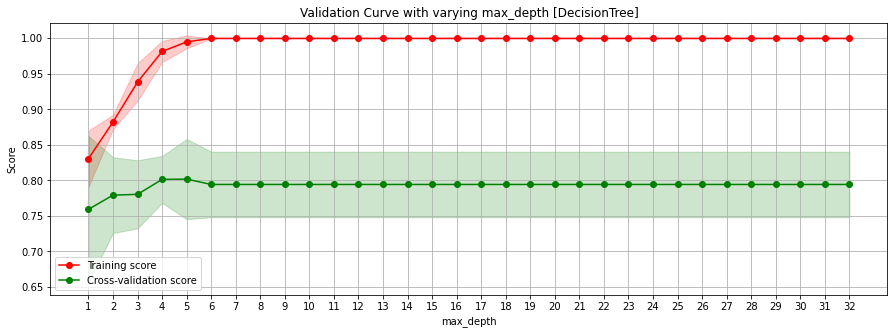

In [48]:
# regularizing max_depth - using validation curve

param_range = np.arange(1, 33, 1)
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=0)
train_scores, test_scores = validation_curve(dt_model, 
                                             X_train, 
                                             y_train, 
                                             param_name="max_depth",  
                                             param_range=param_range,
                                             cv=7, scoring="accuracy")

title = "Validation Curve with varying max_depth [DecisionTree]"
xlabel = "max_depth"
plot_validation_curve(param_range, train_scores, test_scores, title, xlabel)

**Validation curve observations:**

1. validation curve provide performance for both training and testing data
2. Max Depth of 4 gives highest accuracy with minumum variance.
3. We see that our model overfits for large depth values beyond 5. 
4. For max_depth > 5, the tree perfectly predicts all of the train data and accuracy reaches to 1, 
5. For increasing max_depts( > 5), due to increase in variance, performance reduces for test data as model fails to 
   generalize the findings for new data

6. However below 4, model does not provide better accuracy on test data.

#### Regularizing max_depth - using train and test AUC scores.

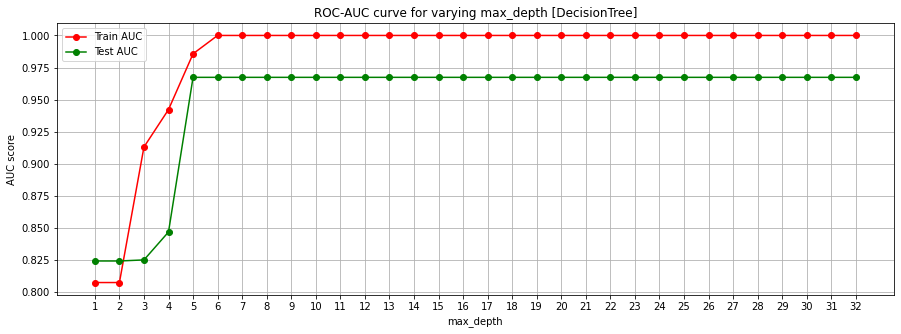

In [49]:
param_range = np.arange(1, 33, 1)
train_results = []
test_results = []
for i in param_range:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=0)
    dt.fit(X_train, y_train)
    # get roc-auc for training data
    y_train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train, y_train_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc) # Add auc score to previous train results
    
    # get roc-auc for testing data
    y_test_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_test_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc) # Add auc score to previous test results

# plot AUC graph for train and test score
title = "ROC-AUC curve for varying max_depth [DecisionTree]"
xlabel = "max_depth"
plot_roc_auc_graph(param_range, train_results, test_results, title, xlabel)

#### ROC-AUC curve observations:

1. We see that our model overfits for large depth values beyond 5. 
2. For max_depth > 5, the tree perfectly predicts all of the train data and accuracy reaches to 1, 
3. For increasing max_depts( > 5), due to increase in variance, performance reduces for test data as model fails to 
   generalize the findings for new data

5. For max_depth=5, model provide highest accuracy with less variance and perform good for both training and test data
6. For max_depth=3,4, model perform better in training but not for test data.

In [50]:
#### Regularizing the Max Depth - using cross-validation technique

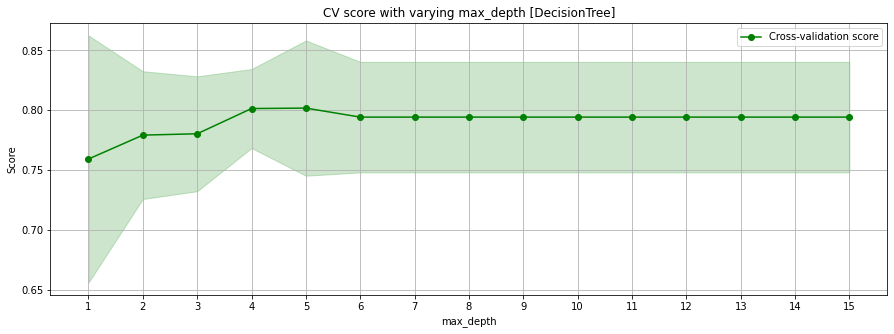

In [51]:
param_range = np.arange(1, 16, 1)
score_list = []

for i in param_range:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=0)
    scores = cross_val_score(estimator=dt, 
                             X=X_train, 
                             y=y_train, 
                             cv=7, 
                             scoring='accuracy') # Perform 7-fold cross validation 
    score_list.append(scores)

# plot CV accuracy score for varying max_depth
title = "CV score with varying max_depth [DecisionTree]"
xlabel = "max_depth"
score_arr = np.array(score_list) # convert into np-array
plot_cv_score_curve(param_range, score_arr, title, xlabel)

#### Observation:CV Score Using Cross validation Technique

1. Shadded portion indicate the variance in the accuracy score
2. For max-depth=4, we can observe model provide better accuracy with minimum variance..
3. For max-depth=5, model provide little higher accuracy but more variance compare to depth=4.

#### Range estimates for max_depth=4 and max_depth=5 and choose the better one

In [52]:
max_depth = 5
dt_model=DecisionTreeClassifier(criterion = 'entropy', max_depth=max_depth, random_state=0)
dt_model.fit(X_train,y_train)
# KFold cross validation to get range estimate
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=7, scoring='accuracy')
print("KFold Cross Validation: Accuracy: %0.04f (+/- %0.4f) [Decision Tree, max_depth = %d]" %(dt_scores.mean()*100, dt_scores.std()*100, max_depth))

max_depth = 4
dt_model=DecisionTreeClassifier(criterion = 'entropy', max_depth=max_depth, random_state=0)
dt_model.fit(X_train,y_train)
# KFold cross validation to get range estimate
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=7, scoring='accuracy')
print("KFold Cross Validation: Accuracy: %0.04f (+/- %0.4f) [Decision Tree, max_depth = %d]" %(dt_scores.mean()*100, dt_scores.std()*100, max_depth))
dt_cv_scores_best_max_depth = dt_scores

KFold Cross Validation: Accuracy: 80.1880 (+/- 5.6471) [Decision Tree, max_depth = 5]
KFold Cross Validation: Accuracy: 80.1504 (+/- 3.3014) [Decision Tree, max_depth = 4]


##### Observation

**max_depth @ 4 provides the better accuracy with lowest variance**

In [53]:
best_max_depth = 4

print("Optimal best_depth: %d" %(best_max_depth)) 
print("KFold Cross Validation: Accuracy: %0.04f (+/- %0.4f) [Decision Tree]" %(dt_cv_scores_best_max_depth.mean()*100, dt_cv_scores_best_max_depth.std()*100))

Optimal best_depth: 4
KFold Cross Validation: Accuracy: 80.1504 (+/- 3.3014) [Decision Tree]


### Iteration 2

**Iteration-2: regularizing parameters:** 

min_Samples_leaf:min_Samples_leaf is thee minimum number of samples required at a leaf Node.

#### regularizing min_sample_leaf - using validation curve

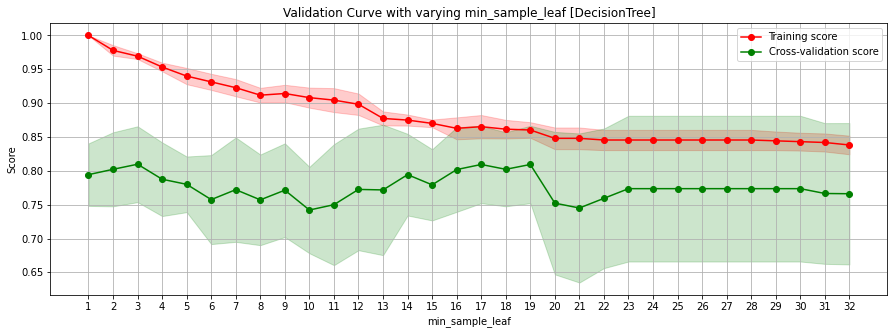

In [54]:
param_range = np.arange(1, 33, 1)
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=0)
train_scores, test_scores = validation_curve(dt_model, 
                                             X_train, 
                                             y_train, 
                                             param_name="min_samples_leaf", 
                                             param_range=param_range,
                                             cv=7, 
                                             scoring="accuracy")

title = "Validation Curve with varying min_sample_leaf [DecisionTree]"
xlabel = "min_sample_leaf"
plot_validation_curve(param_range, train_scores, test_scores, title, xlabel)

#### Observation - validation curve Min Sample Leaf @ Node

1. Increasing min_sample_leaf, the model performance descreses on training data and beyond 19 model performs
   poorly on both the training and tetsing datatset as it cannot learn enough about the data and may cause underfitting.

2. Min_samples_leaf=2,3 provide better accuracy with less variances

**We can further evalute the influence of min_sample_leaf using K-Fold technique and calculate range estimate for identifying optimal value**

#### Regularizing min_sample_leaf: using training and test auc scores.

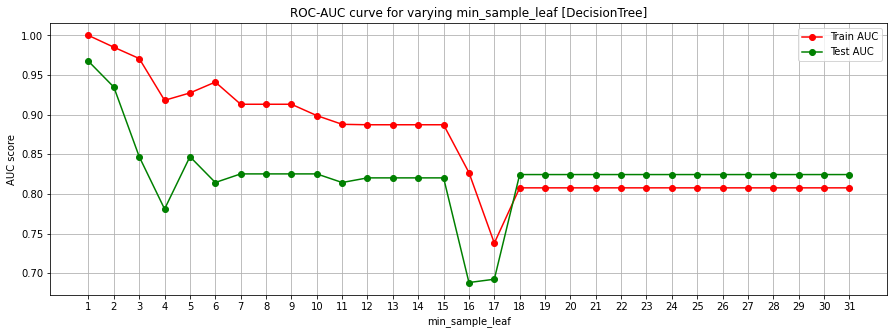

In [55]:
param_range = np.arange(1, 32, 1)
train_results = []
test_results = []
for i in param_range:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=i, random_state=0)
    dt.fit(X_train, y_train)
    # get roc-auc for training data
    y_train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train, y_train_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc) # Add auc score to previous train results
    
    # get roc-auc for testing data
    y_test_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_test_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc) # Add auc score to previous test results

# plot AUC graph for train and test score
title = "ROC-AUC curve for varying min_sample_leaf [DecisionTree]"
xlabel = "min_sample_leaf"
plot_roc_auc_graph(param_range, train_results, test_results, title, xlabel)

#### Observation - AUC Score - Min Sample leaf

Increasing min_sample_leaf value beyond 3, the model cannot learn enough about the data and may cause underfitting.

#### regularizing min_sample_leaf - by cross-validation

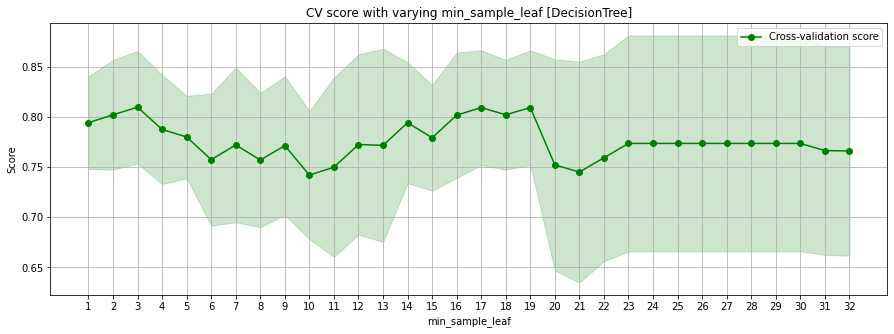

In [56]:
param_range = np.arange(1, 33, 1)
score_list = [] # empty list that will hold cv scores

for i in param_range:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=i, random_state=0)
    scores = cross_val_score(estimator=dt, 
                             X=X_train, 
                             y=y_train, 
                             cv=7, scoring='accuracy') # Perform 7-fold cross validation 
    score_list.append(scores)

# plot CV accuracy score for varying min_sample_leaf
title = "CV score with varying min_sample_leaf [DecisionTree]"
xlabel = "min_sample_leaf"
score_arr = np.array(score_list) # convert into np-array
plot_cv_score_curve(param_range, score_arr, title, xlabel)

#### Observation - Cross Validation Score - Min Sample leaf

**Shadded portion indicate the variance in the accuracy score**

1. Increasing min_sample_leaf, the model performance descreses on training data and beyond 19 model performs poorly on both 
   the training and tetsing datatset as it cannot learn enough about the data and may cause underfitting.
2. min_samples_leaf=2,3 provide better accuracy with less variances

#### Range Estimate for min_sample_leaf=2,3 and choose the optimal one

In [64]:
min_samples_leaf = 2
dt_model=DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=min_samples_leaf, random_state=0)
dt_model.fit(X_train,y_train)

# KFold cross validation to get range estimate
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=7, scoring='accuracy')
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [Decision Tree, min_sample_leaf = %d]" %(dt_scores.mean()*100, dt_scores.std()*100, min_samples_leaf))

min_samples_leaf = 3
dt_model=DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=min_samples_leaf, random_state=0)
dt_model.fit(X_train,y_train)
# KFold cross validation to get range estimate
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=7, scoring='accuracy')
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [Decision Tree, min_sample_leaf = %d]" %(dt_scores.mean()*100, dt_scores.std()*100, min_samples_leaf))

# retain the optimal score data
dt_cv_scores_best_min_samples_leaf = dt_scores

min_samples_leaf = 16
dt_model=DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=min_samples_leaf, random_state=0)
dt_model.fit(X_train,y_train)

# KFold cross validation to get range estimate
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=7, scoring='accuracy')
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [Decision Tree, min_sample_leaf = %d]" %(dt_scores.mean()*100, dt_scores.std()*100, min_samples_leaf))


KFold CV: Accuracy: 80.2256 (+/- 5.4686) [Decision Tree, min_sample_leaf = 2]
KFold CV: Accuracy: 80.9774 (+/- 5.6014) [Decision Tree, min_sample_leaf = 3]
KFold CV: Accuracy: 80.1880 (+/- 6.2476) [Decision Tree, min_sample_leaf = 16]


**Observation** 

Min Sample Leaf = 3 offers the best accuracy 

In [65]:
# as per above experiment, min_samples_leaf=3 provide the better accuracy with lowest variance
best_min_samples_leaf = 3

print("Optimal min_samples_leaf: %d" %(best_min_samples_leaf)) 
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [Decision Tree]" %(dt_cv_scores_best_min_samples_leaf.mean()*100, dt_cv_scores_best_min_samples_leaf.std()*100))

Optimal min_samples_leaf: 3
KFold CV: Accuracy: 80.9774 (+/- 5.6014) [Decision Tree]


### Iteration 3

#### regularizing multiple parameter together using GridSearchCV

So far we were regularizing parameters individually(max_depth or min_sample_leaf) and analysing how the individual hyper parameter influence the model performance.But model shall be determined considering all hyper parameter together we can optimize for more than one hyper-parameter together using GridSearchCV

In [66]:
from sklearn.model_selection import GridSearchCV

# list of hyper parameters and its values for experiment
parameters = {'max_depth':list(range(2,33)),'min_samples_leaf':range(1,33)}

dt_model = DecisionTreeClassifier(criterion='entropy', random_state=0)

clf = GridSearchCV(estimator=dt_model, param_grid=parameters, cv=7, scoring='accuracy')
clf.fit(X_train, y_train)
best_tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.8169172932330826 {'max_depth': 4, 'min_samples_leaf': 3}


**Observation**

GridSearchCV Also gives the optimal value as max_depth=4, and min_samples_leaf=3

#### Range Estimate for min_sample_leaf=3 and max_depth=4

max_depth=4, min_sample_leaf=3 (these values got through GridSearchCV and also Individual parameter analysis)

## Recreate the model with optimal hyper parameters

In [68]:
# optimal hyper-parameters values
best_max_depth = 4
best_min_samples_leaf = 3

dt_model_final=DecisionTreeClassifier(criterion = 'entropy', max_depth = best_max_depth, min_samples_leaf=best_min_samples_leaf, random_state=0)
dt_model_final.fit(X_train,y_train)

# KFold cross validation to get range estimate
dt_scores = cross_val_score(dt_model_final, X_train, y_train, cv=7, scoring='accuracy')

# retain the optimal score data
dt_cv_scores_final = dt_scores

print("Optimal hyperparameter are: max_depth: %d, min_samples_leaf: %d" %(best_max_depth, best_min_samples_leaf)) 
print("KFold Cross Validation: Accuracy: %0.04f (+/- %0.4f) [Decision Tree]" %(dt_cv_scores_final.mean()*100, dt_cv_scores_final.std()*100))

Optimal hyperparameter are: max_depth: 4, min_samples_leaf: 3
KFold Cross Validation: Accuracy: 81.6917 (+/- 4.3307) [Decision Tree]


### Prediction with Optinmal Hyper Parameters

In [69]:
# using the above hyper parameters, predict the outcome for test data

print("\nAccuracy after Regularizing hyper Parameter: ")
y_predict = dt_model_final.predict(X_test)

# calculate accuracy score on test data (this is unseen data)
acc = metrics.accuracy_score(y_test,y_predict)
print("\nProduction: Accuracy Score: ", acc)

#Confusion Matric: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
cm = metrics.confusion_matrix(y_test, y_predict)
print("\nConfusion Matrix\n", cm)

# analysing cross-tab using classification report for the model
cr = metrics.classification_report(y_test, y_predict)
print("\nClassification Report::\n",cr)


Accuracy after Regularizing hyper Parameter: 

Production: Accuracy Score:  0.847457627118644

Confusion Matrix
 [[11  2]
 [ 7 39]]

Classification Report::
               precision    recall  f1-score   support

         0.0       0.61      0.85      0.71        13
         1.0       0.95      0.85      0.90        46

    accuracy                           0.85        59
   macro avg       0.78      0.85      0.80        59
weighted avg       0.88      0.85      0.86        59



## Comparision - Decision Tree(Default) Vs Decision Tree(Optimal Hyper Parameter)

In [70]:
# Let's compare the performance result of both default Dicision Tree and Dicision tree with optimal hyper parameter 

print("Performance Camparision: DecisionTree(Default) Vs DecisionTree(Optimal)\n")
      
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [DecisionTree(Default)]" %(dt_cv_scores.mean()*100, dt_cv_scores.std()*100))
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [DecisionTree(Optimal)]" %(dt_cv_scores_final.mean()*100, dt_cv_scores_final.std()*100))

mean_diff = dt_cv_scores_final.mean() - dt_cv_scores.mean()
std_diff = dt_cv_scores_final.std() - dt_cv_scores.std()
print("\nImprovement:: Mean difference: %0.4F, Standard Deviation Difference: %0.4f" %(mean_diff*100, std_diff*100))

Performance Camparision: DecisionTree(Default) Vs DecisionTree(Optimal)

KFold CV: Accuracy: 79.4361 (+/- 4.6172) [DecisionTree(Default)]
KFold CV: Accuracy: 81.6917 (+/- 4.3307) [DecisionTree(Optimal)]

Improvement:: Mean difference: 2.2556, Standard Deviation Difference: -0.2865


#### Observation - Decision tree(Default) Vs Decision Tree(Optimal)

1. As per above experiment, It is found that by identifying the optimal hyper-parameter, performance is increased and        variances also decrease slightly
2. Here optimal model provide better accuracy and relaibility due to less variance in production systems.

**As we have observed in validation curve, model does not provide significant improvement in performance beyond certain limit. However it demands for more execution time and CPU resources.**

**It is always advisable to find the optimal parameter which is just-right for the model giving sweet spot for variance and bais error**

<h1 id="Q.8 Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)">Q.8 Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)</h3>

### Fitting Model - Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(criterion='entropy',random_state=0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Prediction - Random Forest

In [72]:
# predict the outcome for test data
y_predict = rf_model.predict(X_test)

# calculate accuracy score on test data (accuracy for unseen data)
acc = metrics.accuracy_score(y_test,y_predict)
print("\nProduction: Accuracy Score: ", acc)


Production: Accuracy Score:  0.9322033898305084


### Validation - K Fold

In [73]:
# KFold validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=7, scoring='accuracy')
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [RandomForest-Default]" %(cv_scores.mean()*100, cv_scores.std()*100))

rf_kfold_cv_scores = cv_scores

KFold CV: Accuracy: 87.5564 (+/- 4.4675) [RandomForest-Default]


### Feature Imporatance

In [75]:
# For above trained model get the feature importance
feature_imp = pd.DataFrame(rf_model.feature_importances_, columns = ["Imp"], index = feature_df_mm.columns)
print(feature_imp)

                       Imp
MDVP:Fo(Hz)       0.076930
MDVP:Fhi(Hz)      0.054676
MDVP:Flo(Hz)      0.049395
MDVP:Jitter(%)    0.016741
MDVP:Jitter(Abs)  0.023001
MDVP:RAP          0.022886
MDVP:PPQ          0.020809
Jitter:DDP        0.026499
MDVP:Shimmer      0.038210
MDVP:Shimmer(dB)  0.030298
Shimmer:APQ3      0.037334
Shimmer:APQ5      0.038628
MDVP:APQ          0.061779
Shimmer:DDA       0.032897
NHR               0.029907
HNR               0.033160
RPDE              0.043500
DFA               0.028704
spread1           0.120823
spread2           0.080887
D2                0.034423
PPE               0.098512


[0.08514886 0.05040625 0.05160251 0.01564298 0.02413524 0.04408683
 0.01671708 0.02967292 0.04064295 0.0364837  0.03273346 0.05029659
 0.05842931 0.02435893 0.02193912 0.02427969 0.02770281 0.02540426
 0.11608297 0.06068082 0.04745199 0.11610075]


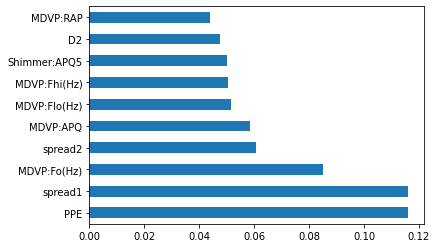

In [76]:
X = np.array(feature_df_mm)
y = np.array(target_df_mm)
model = RandomForestClassifier(criterion='entropy',random_state=0)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index = feature_df_mm.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### Regularizing n_estimators - using validation curve

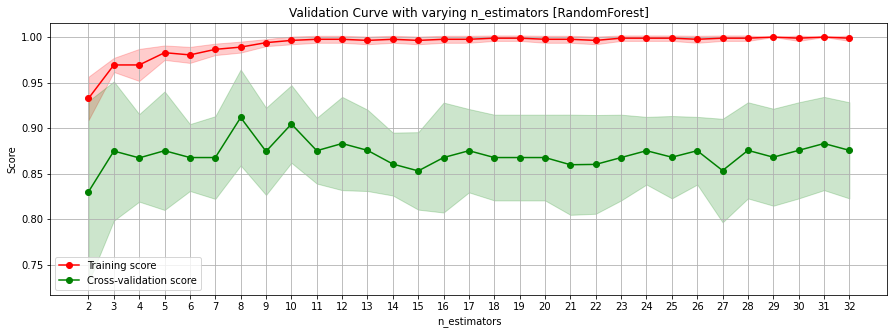

In [77]:
param_range = np.arange(2, 33, 1)
rf_model = RandomForestClassifier(criterion='entropy', random_state=0)
train_scores, test_scores = validation_curve(rf_model, 
                                             X_train, 
                                             y_train, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=7, 
                                             scoring="accuracy")

title = "Validation Curve with varying n_estimators [RandomForest]"
xlabel = "n_estimators"
plot_validation_curve(param_range, train_scores, test_scores, title, xlabel)

#### Observation - Validation Curve - Random Forest Classifier(Default)

1. validation curve provide performance for both training and testing data
2. We see that our model overfits for large n_estimators values beyond 10. 
3. For n_estimators > 10, the tree perfectly predicts all of the train data and accuracy reaches to 1, 
4. For increasing n_estimators( > 10), due to increase in variance, performance reduces for test data as model fails to generalize the findings for new data
5. Model provide best accuracy with low variance for n_estimators = 8

### Regularizing multiple parameter together using GridSearchCV

In [79]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': range(2,32)}

rf_model = RandomForestClassifier(criterion='entropy', random_state=0)

clf = GridSearchCV(estimator=rf_model, param_grid=parameters, cv=7, scoring='accuracy')
clf.fit(X_train, y_train) 

best_tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.9116541353383457 {'n_estimators': 8}


#### Observation

**As seen above both validation curve and GridSearchCV estimate optimal value for n_estimators =8**


### Finding Optimal n-Estimators with DTC Optimal Parameters 

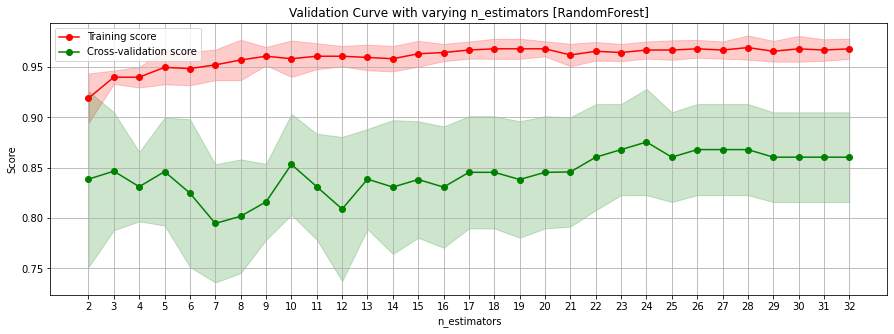

In [81]:
# lets try to identify the optimal n_estimators along with hyper-parameters as found in previous section of dicision tree
# for max_depth=4, min_samples_leaf=3

param_range = np.arange(2, 33, 1)

rf_model = RandomForestClassifier(criterion='entropy', random_state=0, max_depth=4, min_samples_leaf=3)
train_scores, test_scores = validation_curve(rf_model, 
                                             X_train, 
                                             y_train, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=7, 
                                             scoring="accuracy")

title = "Validation Curve with varying n_estimators [RandomForest]"
xlabel = "n_estimators"
plot_validation_curve(param_range, train_scores, test_scores, title, xlabel)

#### Observation - Validation Curve - RFC with DTC Optimal Parameters

**Model provide best accuracy with low variance for n_estimators = 24 for hyperparameters max_depth=4, min_samples_leaf=3**

### Regularisation - Optimal n-Estimators, optimal Max Depth & Min sample leaf.

In [82]:
# Let's use GridSearchCV to identify optimal hyper-parameters together for n_estimators, max_depth, min_samples_leaf

from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': range(2,16),'max_depth': range(2,10),'min_samples_leaf': range(2,10)}

rf_model = RandomForestClassifier(criterion='entropy', random_state=0)

clf = GridSearchCV(estimator=rf_model, param_grid=parameters, cv=7, scoring='accuracy')
clf.fit(X_train, y_train) 

best_tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.8902255639097744 {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 14}


In [83]:
# Lets find the range estimate for following hyper-parameter combinations:
# Experiment-1: n_estimators = 8 
# Experiment-2: n_estimators = 24, max_depth=4, min_sample_leaf=3  (considering DT model optimal param)
# Experiment-3: n_estimators = 14, max_depth=5, min_sample_leaf=2  (as per GridSearchCV)

# Experiment-1
n_estimators = 8
rf_model = RandomForestClassifier(criterion='entropy', n_estimators = n_estimators, random_state=0)
rf_model.fit(X_train,y_train)
# KFold validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=7, scoring='accuracy')
print("Optimal parameters: n_estimators: %d" %(n_estimators))
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [RandomForest]" %(cv_scores.mean()*100, cv_scores.std()*100))

# Experiment-2
n_estimators = 24
max_depth = 4
min_samples_leaf = 3
rf_model = RandomForestClassifier(criterion='entropy',
                                  random_state=0, 
                                  n_estimators = n_estimators, 
                                  max_depth=max_depth,
                                  min_samples_leaf=min_samples_leaf)
rf_model.fit(X_train,y_train)
# KFold validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=7, scoring='accuracy')
print("\nOptimal parameters: n_estimators: %d, max_depth: %d, min_samples_leaf: %d" %(n_estimators,max_depth,min_samples_leaf))
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [RandomForest,]" %(cv_scores.mean()*100, cv_scores.std()*100))

#Experiment-3
n_estimators = 14
max_depth = 5
min_samples_leaf = 2
rf_model = RandomForestClassifier(criterion='entropy',
                                  random_state=0, 
                                  n_estimators = n_estimators, 
                                  max_depth=max_depth,
                                  min_samples_leaf=min_samples_leaf)
rf_model.fit(X_train,y_train)
# KFold validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=7, scoring='accuracy')
print("\nOptimal parameters: n_estimators: %d, max_depth: %d, min_samples_leaf: %d" %(n_estimators,max_depth,min_samples_leaf))
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [RandomForest,]" %(cv_scores.mean()*100, cv_scores.std()*100))

Optimal parameters: n_estimators: 8
KFold CV: Accuracy: 91.1654 (+/- 5.2666) [RandomForest]

Optimal parameters: n_estimators: 24, max_depth: 4, min_samples_leaf: 3
KFold CV: Accuracy: 87.5564 (+/- 5.2795) [RandomForest,]

Optimal parameters: n_estimators: 14, max_depth: 5, min_samples_leaf: 2
KFold CV: Accuracy: 89.0226 (+/- 4.9567) [RandomForest,]


In [84]:
# as per above experiment, n_estimators = 8 provide the highest accuracy with bets range estimate
# Let's recreate the model with this parameter and perfomr production test and confusion matix

n_estimators = 8
rf_model_final = RandomForestClassifier(criterion='entropy', n_estimators = n_estimators, random_state=0)
rf_model_final.fit(X_train,y_train)

# predict the outcome for test data
y_predict = rf_model_final.predict(X_test)

# calculate accuracy score on test data (accuracy for unseen data)
acc = metrics.accuracy_score(y_test,y_predict)
print("\nProduction: Accuracy Score: ", acc)

#Confusion Matric: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
cm = metrics.confusion_matrix(y_test, y_predict)
print("\nConfusion Matrix\n", cm)

# analysing cross-tab using classification report for the model
cr = metrics.classification_report(y_test, y_predict)
print("\nClassification Report::\n",cr)


Production: Accuracy Score:  0.9152542372881356

Confusion Matrix
 [[12  1]
 [ 4 42]]

Classification Report::
               precision    recall  f1-score   support

         0.0       0.75      0.92      0.83        13
         1.0       0.98      0.91      0.94        46

    accuracy                           0.92        59
   macro avg       0.86      0.92      0.89        59
weighted avg       0.93      0.92      0.92        59



In [86]:
# KFold validation
cv_scores = cross_val_score(rf_model_final, X_train, y_train, cv=7, scoring='accuracy')
rf_cv_scores_final = cv_scores

print("Optimal parameter: n_estimators: %d" %(n_estimators))
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [RandomForest]" %(rf_cv_scores_final.mean()*100, rf_cv_scores_final.std()*100))

Optimal parameter: n_estimators: 8
KFold CV: Accuracy: 91.1654 (+/- 5.2666) [RandomForest]


In [87]:
# Let's compare the performance result of both Dicision Tree and Random forest 

print("Performance Camparision: Random forest Vs Decision Tree\n")
      
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [Random Forest]" %(rf_cv_scores_final.mean()*100, rf_cv_scores_final.std()*100))
print("KFold CV: Accuracy: %0.04f (+/- %0.4f) [Decision Tree]" %(dt_cv_scores_final.mean()*100, dt_cv_scores_final.std()*100))

mean_diff = rf_cv_scores_final.mean() - dt_cv_scores_final.mean()
std_diff = rf_cv_scores_final.std() - dt_cv_scores_final.std()
print("\nImprovement:: Mean difference: %0.4F, Standard Deviation Difference: %0.4f" %(mean_diff*100, std_diff*100))

Performance Camparision: Random forest Vs Decision Tree

KFold CV: Accuracy: 91.1654 (+/- 5.2666) [Random Forest]
KFold CV: Accuracy: 81.6917 (+/- 4.3307) [Decision Tree]

Improvement:: Mean difference: 9.4737, Standard Deviation Difference: 0.9360


### Conclusion

**Random Forest is defnitely a better model with accuracy of 91%.**